## TIME SERIES ANALYSIS ON AMD DATASET

### What is Time Series Analysis?

- Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data


- Time series forecasting is the use of a model to predict future values based on previously observed values

### What is AMD?

- Founded in 1969 as a Silicon Valley start-up, the AMD journey began with dozens of employees focused on leading-edge semiconductor products


- From those modest beginnings, AMD has grown into a global company of 10,000 people, achieving many important industry firsts along the way


- AMD today develops high-performance computing and visualization products to solve some of the world’s toughest and most interesting challenges

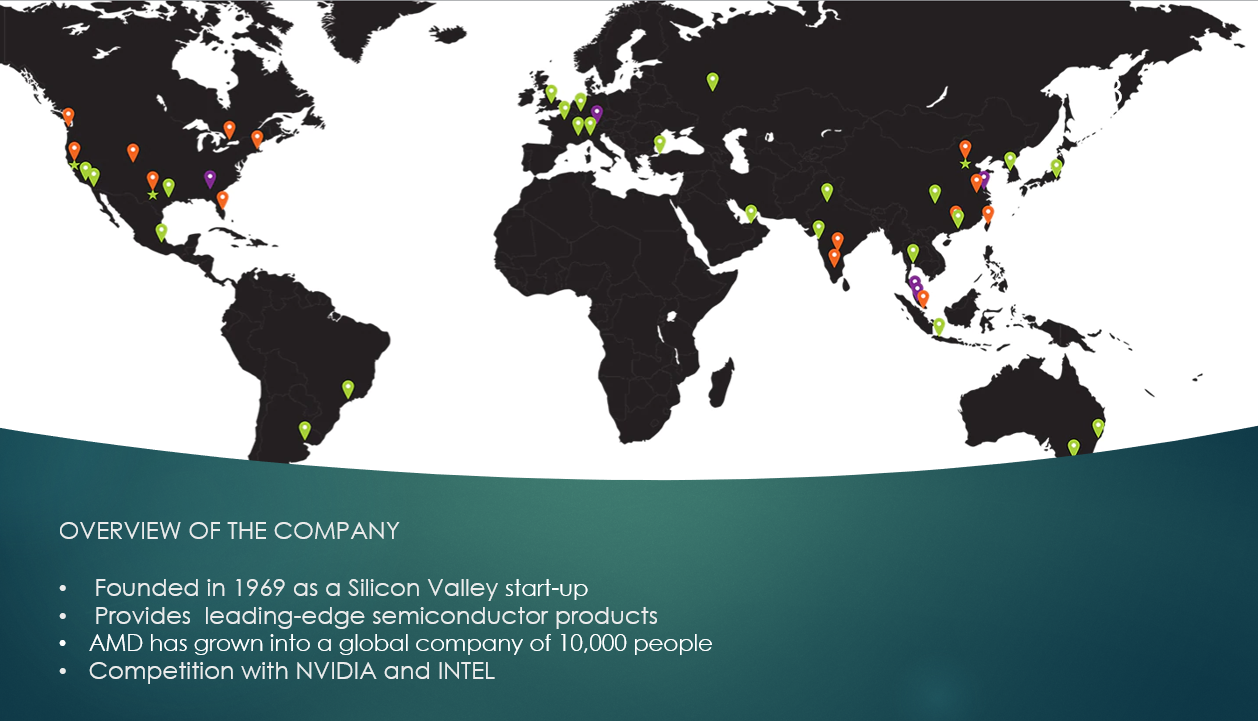

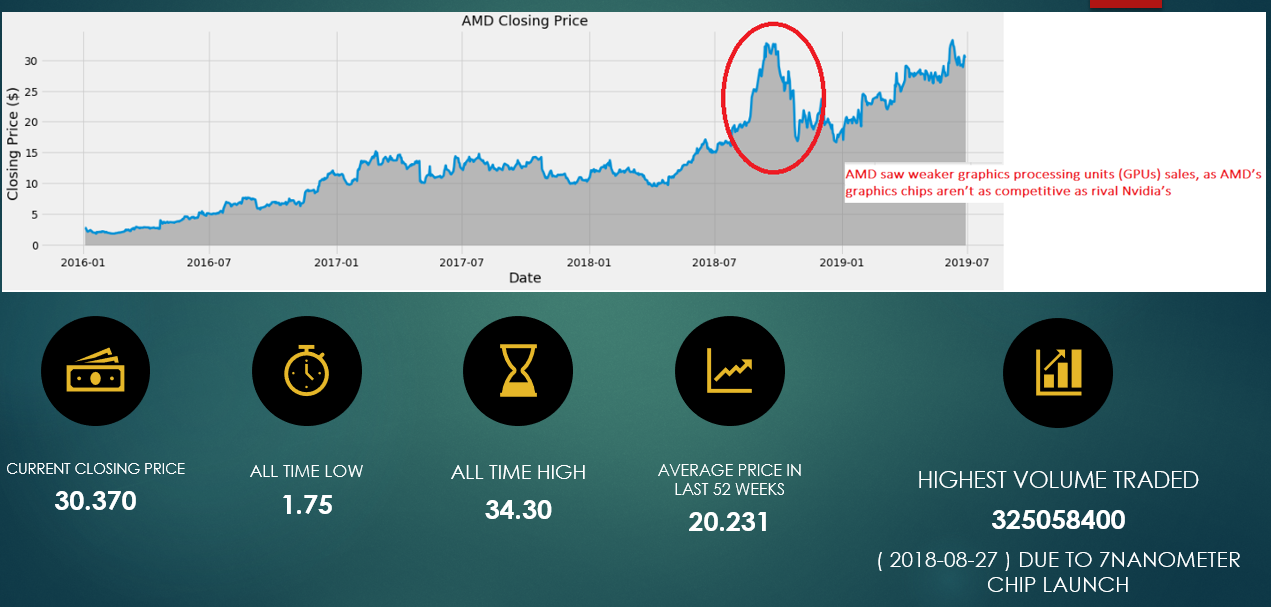

## IMPORTING DATA AND CREATING DATASET ==================================================================

In [1375]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv
from scipy import stats
from numpy import transpose, array
import logging
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
import os 
from sklearn import decomposition
import math
from sklearn.preprocessing import StandardScaler

plt.style.use('fivethirtyeight')

## Reading all the dataset ==================================================================

In [2]:
file = os.listdir(r'C:\Users\91880\Desktop\Data Science Practice\Semester 3 - ML in finance\Data')
file = [r'C:\Users\91880\Desktop\Data Science Practice\Semester 3 - ML in finance\Data"\"' + i for i in file]

In [1569]:
amd = pd.read_excel('.\Data\AMD.xls', sheet_name= 'AMD')
ads_vintages = pd.read_excel(r'.\Data\ads_vintages-zip.xlsx')
daily_ff_factors = pd.read_csv(r'.\Data\daily-ff-factors.csv')
# F_F_Research_Data_Factors_daily = pd.read_csv(r'.\Data\F-F_Research_Data_Factors_daily.csv')
MACRO_FACTOR = pd.read_excel(r'.\Data\MACRO_FACTOR.xlsx')
MACRO_FACTOR_SELECT = pd.read_excel(r'.\Data\MACRO_FCTR_SELECT.xls')
TB_TERM_STRUCT_3YR = pd.read_excel(r'.\Data\TB_TERM_STRUCT_3YR.xlsx')

## Combining all the Dataset ==================================================================

In [1602]:
print('AMD : ', amd.shape) # PCA and then consider
print('ads_vintages : ', ads_vintages.shape) # PCA and then consider
print('daily_ff_factors' , daily_ff_factors.shape) # consider
#print('MACRO_FACTOR' , MACRO_FACTOR.shape) # not to use
print('MACRO_FACTOR_SELECT' , MACRO_FACTOR_SELECT.shape) # not to use
print('TB_TERM_STRUCT_3YR', TB_TERM_STRUCT_3YR.shape) # selct columns and proceed


AMD :  (878, 5)
ads_vintages :  (21855, 71)
daily_ff_factors (878, 5)
MACRO_FACTOR_SELECT (46, 4)
TB_TERM_STRUCT_3YR (974, 13)


## Changing the date to the required format to merge the sheets ==================================================================

#### 1. ads_vintages DATASET

In [1603]:
ads_vintages.reset_index(drop = False, inplace= True)

In [1604]:
ads_vintages.head()

index  ADS_Index_010319  ADS_Index_010419  ADS_Index_011019  \
0 1960-03-01         -1.816423         -1.816423         -1.816423   
1 1960-03-02         -1.795828         -1.795828         -1.795828   
2 1960-03-03         -1.774851         -1.774851         -1.774851   
3 1960-03-04         -1.753491         -1.753491         -1.753491   
4 1960-03-05         -1.731743         -1.731743         -1.731743   

   ADS_Index_011719  ADS_Index_011819  ADS_Index_012419  ADS_Index_013119  \
0         -1.816423         -1.816423         -1.816423         -1.816423   
1         -1.795828         -1.795828         -1.795828         -1.795828   
2         -1.774851         -1.774851         -1.774851         -1.774851   
3         -1.753491         -1.753491         -1.753491         -1.753491   
4         -1.731743         -1.731743         -1.731743         -1.731743   

   ADS_Index_020119  ADS_Index_020719        ...         ADS_Index_091219  \
0         -1.824388         -1.824388        ...                -2.395069   
1         -1.803702         -1.803702        ...                -2.369012   
2         -1.782618         -1.782618        ...                -2.341905   
3         -1.761132         -1.761132        ...                -2.313746   
4         -1.739243         -1.739243        ...                -2.284532   

   ADS_Index_091719  ADS_Index_091919  ADS_Index_092619  ADS_Index_092719  \
0         -2.395069         -2.395069         -2.395069         -2.395069   
1         -2.369012         -2.369012         -2.369012         -2.369012   
2         -2.341905         -2.341905         -2.341905         -2.341905   
3         -2.313746         -2.313746         -2.313746         -2.313746   
4         -2.284532         -2.284532         -2.284532         -2.284532   

   ADS_Index_100319  ADS_Index_100419  ADS_Index_101019  ADS_Index_101719  \
0         -2.395069         -2.395069         -2.395069         -2.395069   
1         -2.369012         -2.369012         -2.369012         -2.369012   
2         -2.341905         -2.341905         -2.341905         -2.341905   
3         -2.313746         -2.313746         -2.313746         -2.313746   
4         -2.284532         -2.284532         -2.284532         -2.284532   

   ADS_Index_102419  
0         -2.395069  
1         -2.369012  
2         -2.341905  
3         -2.313746  
4         -2.284532  

[5 rows x 72 columns]

In [1605]:
ads_vintages.dtypes[:3]

index               datetime64[ns]
ADS_Index_010319           float64
ADS_Index_010419           float64
dtype: object

#### 2. daily_ff_factors Dataset

In [1606]:
daily_ff_factors.head(2)

Date  Mkt-RF   SMB   HML   RF
0  20160104   -1.59 -0.83  0.53  0.0
1  20160105    0.12 -0.22  0.01  0.0

In [1607]:
daily_ff_factors['Date'] = daily_ff_factors['Date'].astype(str)

In [1608]:
daily_ff_factors['DateTime'] = daily_ff_factors['Date'].apply(lambda x: pd.to_datetime(x, format='%Y%m%d'))

In [1609]:
daily_ff_factors.head(2)

Date  Mkt-RF   SMB   HML   RF   DateTime
0  20160104   -1.59 -0.83  0.53  0.0 2016-01-04
1  20160105    0.12 -0.22  0.01  0.0 2016-01-05

In [1610]:
daily_ff_factors.dtypes[3:]

HML                float64
RF                 float64
DateTime    datetime64[ns]
dtype: object

#### 3. MACRO_FACTOR_SELECT Dataset

In [1611]:
MACRO_FACTOR_SELECT.head(2)

Date  CPIAUCSL    INDPRO         IMPCH
0 2016-01-01   237.833  102.9525  37126.434120
1 2016-02-01   237.469  102.2225  36066.892525

In [1612]:
MACRO_FACTOR_SELECT.dtypes

Date        datetime64[ns]
CPIAUCSL           float64
INDPRO             float64
IMPCH              float64
dtype: object

#### 4. TB_TERM_STRUCT_3YR DATASET

In [1613]:
TB_TERM_STRUCT_3YR.head()

Date  1 Mo  2 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  \
0 2016-01-04  0.17   NaN  0.22  0.49  0.61  1.02  1.31  1.73  2.06   2.24   
1 2016-01-05  0.20   NaN  0.20  0.49  0.68  1.04  1.32  1.73  2.06   2.25   
2 2016-01-06  0.21   NaN  0.21  0.47  0.67  0.99  1.26  1.65  1.98   2.18   
3 2016-01-07  0.20   NaN  0.20  0.46  0.66  0.96  1.22  1.61  1.94   2.16   
4 2016-01-08  0.20   NaN  0.20  0.45  0.64  0.94  1.20  1.57  1.91   2.13   

   20 Yr  30 Yr  
0   2.64   2.98  
1   2.67   3.01  
2   2.59   2.94  
3   2.56   2.92  
4   2.55   2.91

In [1614]:
TB_TERM_STRUCT_3YR.tail(2)

Date  1 Mo  2 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  \
972 2019-11-21  1.57  1.57  1.58  1.59  1.55  1.60  1.59  1.62  1.71   1.77   
973 2019-11-22  1.58  1.59  1.58  1.59  1.56  1.61  1.60  1.62  1.71   1.77   

     20 Yr  30 Yr  
972   2.09   2.24  
973   2.08   2.22

In [1615]:
TB_TERM_STRUCT_3YR.dtypes[:2]

Date    datetime64[ns]
1 Mo           float64
dtype: object

#### 5. AMD Dataset

In [1616]:
amd.head(2)

Open  Close  High   Low    Volume
Date                                         
2016-01-04  2.77   2.77  2.82  2.63  32516800
2016-01-05  2.77   2.75  2.80  2.64  12972300

In [1617]:
amd.dtypes

Open      float64
Close     float64
High      float64
Low       float64
Volume      int64
dtype: object

## Data Cleaning and Preprocessing ==================================================================

#### AMD Dataset

In [1618]:
## Changing the data to the required format

amd['Open_Close'] = amd['Open'] - amd['Close'] # open close price
amd['High_Low'] = amd['High'] - amd['Low'] # high low price
amd['Open_tmr'] = amd['Open'].shift(-1) # tomorrow's open price
amd['log_Vol'] = np.log(amd['Volume']) # log Volume for scaling
amd['Close_tmr'] = amd['Close'].shift(-1) # tomorrow's close price

In [1619]:
amd.describe()

Open       Close        High         Low        Volume  \
count  878.000000  878.000000  878.000000  878.000000  8.780000e+02   
mean    13.603918   13.602027   13.919772   13.277973  6.261189e+07   
std      7.742353    7.730164    7.926530    7.536393  4.303860e+07   
min      1.810000    1.800000    1.900000    1.750000  5.591100e+06   
25%      7.682500    7.670000    7.837500    7.477500  3.450732e+07   
50%     12.400000   12.290000   12.655000   12.115000  5.256310e+07   
75%     18.142500   18.345000   18.852501   17.407500  7.958815e+07   
max     33.529999   33.230000   34.299999   33.080002  3.250584e+08   

       Open_Close    High_Low    Open_tmr     log_Vol   Close_tmr  
count  878.000000  878.000000  877.000000  878.000000  877.000000  
mean     0.001891    0.641800   13.616271   17.718692   13.614379  
std      0.524535    0.539710    7.738108    0.725028    7.725902  
min     -2.439998    0.060000    1.810000   15.536687    1.800000  
25%     -0.180000    0.282500    7.720000   17.356679    7.670000  
50%      0.010000    0.460000   12.400000   17.777525   12.300000  
75%      0.209999    0.830000   18.150000   18.192375   18.350000  
max      3.370001    4.269998   33.529999   19.599515   33.230000

In [1620]:
amd.shape

(878, 10)

In [1621]:
amd[60:62]

Open  Close  High   Low   Volume  Open_Close  High_Low  Open_tmr  \
Date                                                                           
2016-03-31  2.84   2.85  2.88  2.80  9071500       -0.01      0.08      2.79   
2016-04-01  2.79   2.83  2.88  2.76  8257700       -0.04      0.12      2.83   

              log_Vol  Close_tmr  
Date                              
2016-03-31  16.020648       2.83  
2016-04-01  15.926657       2.83

In [1622]:
amd = amd.fillna(0)

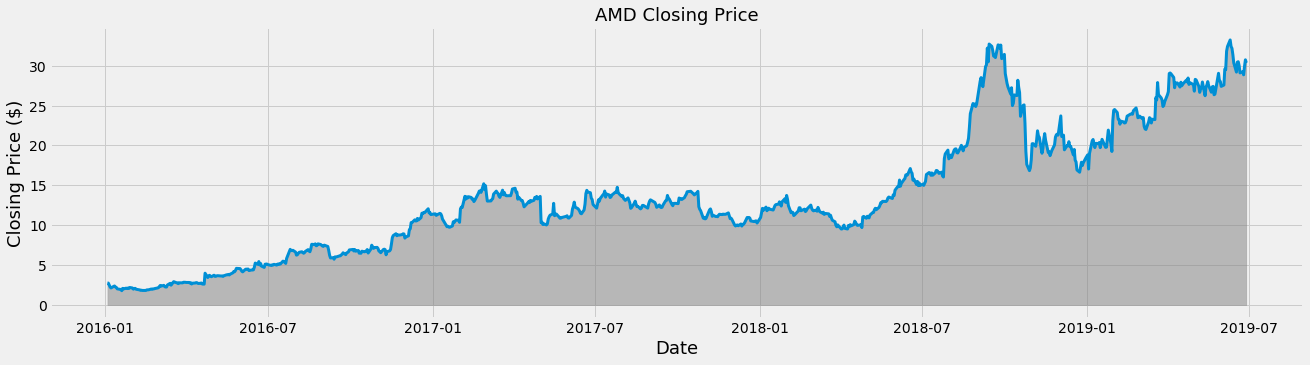

In [1051]:
plt.figure(figsize=(20,5))

# Draw the graph
plt.style.use('fivethirtyeight')
plt.plot(amd['Date'], amd['Close'], linewidth = 3)
plt.fill_between(amd['Date'].tolist(), amd['Close'].tolist(),color='grey',alpha='0.5', interpolate=True)
plt.xlabel('Date', fontsize=18)
plt.ylabel("Closing Price ($)", fontsize=18)
plt.title("AMD Closing Price", fontsize=18)

plt.show()


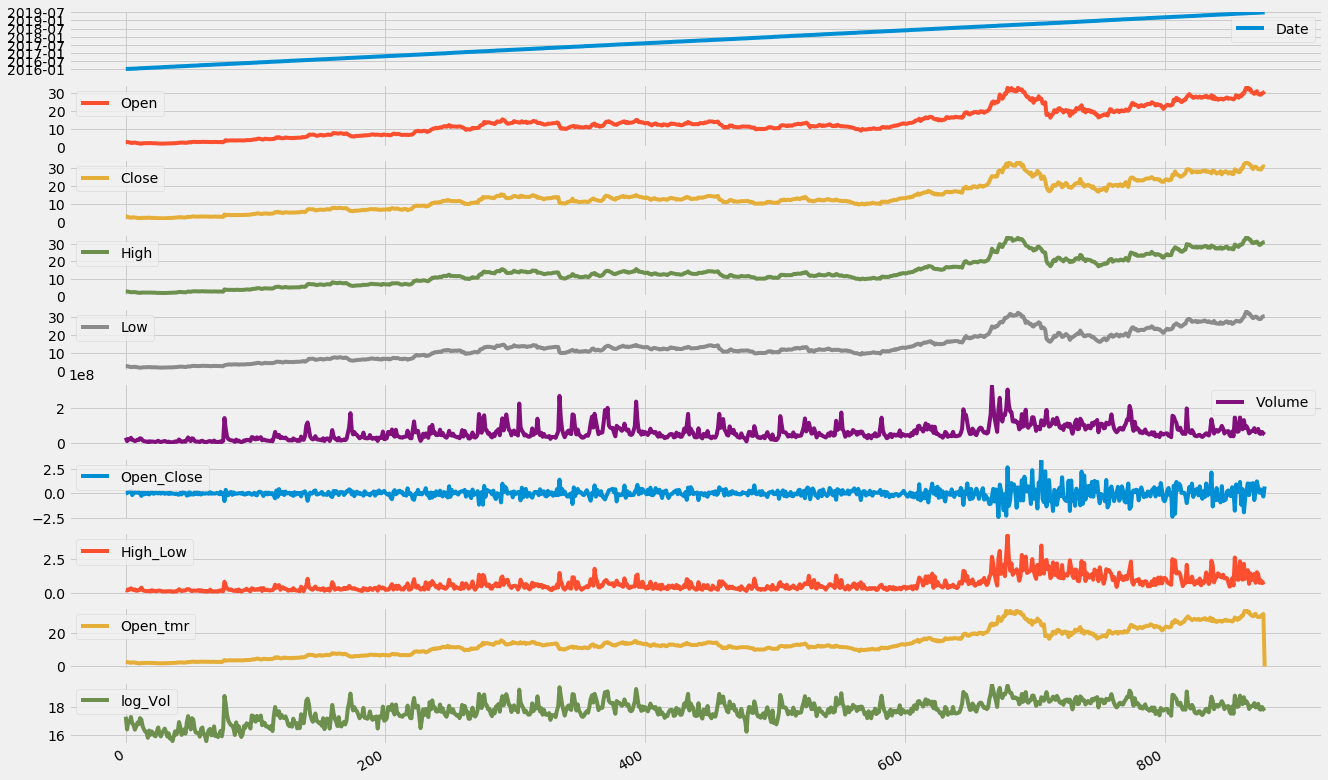

In [25]:
## Visualizing the datasets

amd.plot(subplots=True, figsize=(20,15))
plt.show()

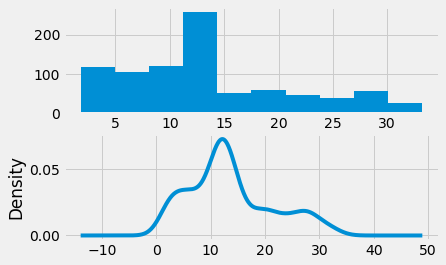

In [26]:
plt.figure(1)
plt.subplot(211)
amd.Close.hist()
plt.subplot(212)
amd.Close.plot(kind='kde')
plt.show()

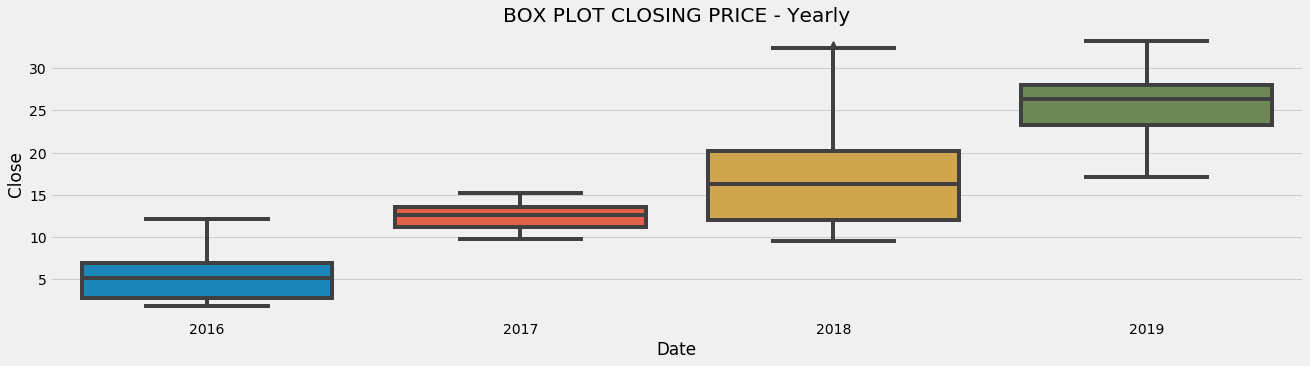

In [1486]:
fig, ax = plt.subplots(figsize=(20,5))
plt.title('BOX PLOT CLOSING PRICE - Yearly')
sns.boxplot(amd.Date.dt.year, amd.Close, ax=ax)

In [28]:
# Correlation between the features

corr = amd.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

In [29]:
# OHLC Chart

import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
trace = go.Ohlc(x=amd[800:].Date, open=amd[800:].Open, high=amd[800:].High,low=amd[800:].Low, close=amd[800:].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

#### MACRO_FACTOR_SELECT Dataset

In [31]:
MACRO_FACTOR_SELECT.head(2)

Date  CPIAUCSL    INDPRO         IMPCH
0 2016-01-01   237.833  102.9525  37126.434120
1 2016-02-01   237.469  102.2225  36066.892525

In [32]:
# Correlation between the features

corr = MACRO_FACTOR_SELECT.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

#### daily_ff_factors Dataset

In [33]:
print(daily_ff_factors.shape)

(878, 6)


In [34]:
daily_ff_factors.head(2)

Date  Mkt-RF   SMB   HML   RF   DateTime
0  20160104   -1.59 -0.83  0.53  0.0 2016-01-04
1  20160105    0.12 -0.22  0.01  0.0 2016-01-05

In [35]:
corr = daily_ff_factors.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

#### ads_vintages DATASET

In [36]:
ads_vintages.tail()

index  ADS_Index_010319  ADS_Index_010419  ADS_Index_011019  \
21850 2019-12-27               NaN               NaN               NaN   
21851 2019-12-28               NaN               NaN               NaN   
21852 2019-12-29               NaN               NaN               NaN   
21853 2019-12-30               NaN               NaN               NaN   
21854 2019-12-31               NaN               NaN               NaN   

       ADS_Index_011719  ADS_Index_011819  ADS_Index_012419  ADS_Index_013119  \
21850               NaN               NaN               NaN               NaN   
21851               NaN               NaN               NaN               NaN   
21852               NaN               NaN               NaN               NaN   
21853               NaN               NaN               NaN               NaN   
21854               NaN               NaN               NaN               NaN   

       ADS_Index_020119  ADS_Index_020719        ...         ADS_Index_091219  \
21850               NaN               NaN        ...                      NaN   
21851               NaN               NaN        ...                      NaN   
21852               NaN               NaN        ...                      NaN   
21853               NaN               NaN        ...                      NaN   
21854               NaN               NaN        ...                      NaN   

       ADS_Index_091719  ADS_Index_091919  ADS_Index_092619  ADS_Index_092719  \
21850               NaN               NaN               NaN               NaN   
21851               NaN               NaN               NaN               NaN   
21852               NaN               NaN               NaN               NaN   
21853               NaN               NaN               NaN               NaN   
21854               NaN               NaN               NaN               NaN   

       ADS_Index_100319  ADS_Index_100419  ADS_Index_101019  ADS_Index_101719  \
21850               NaN               NaN               NaN               NaN   
21851               NaN               NaN               NaN               NaN   
21852               NaN               NaN               NaN               NaN   
21853               NaN               NaN               NaN               NaN   
21854               NaN               NaN               NaN               NaN   

       ADS_Index_102419  
21850               NaN  
21851               NaN  
21852               NaN  
21853               NaN  
21854               NaN  

[5 rows x 72 columns]

In [37]:
ads_vintages.shape
#ads_vintages[20397: 21669]

(21855, 72)

In [38]:
ads_vintages.head(2)
ads_vintages.set_index('index', inplace= True)

In [39]:
X = ads_vintages[20397: 21669].copy()
X = X.fillna(0)

X_scaled = StandardScaler().fit_transform(X)
pca = decomposition.PCA(n_components=6)
X_pca_scaled = pca.fit_transform(X)

In [40]:
pca.explained_variance_ratio_

array([9.33312417e-01, 4.61093832e-02, 1.28718641e-02, 3.42086826e-03,
       1.12347911e-03, 8.51918145e-04])

In [41]:
pca.singular_values_

array([79.6426561 , 17.70218479,  9.3530431 ,  4.82170225,  2.76321523,
        2.40619682])

## MODELS ==================================================================

#### Fama French

In [42]:
ff_factors = pd.read_csv(r'.\Data\daily-ff-factors.csv')
ff_factors.head()

Date  Mkt-RF   SMB   HML   RF
0  20160104   -1.59 -0.83  0.53  0.0
1  20160105    0.12 -0.22  0.01  0.0
2  20160106   -1.35 -0.12 -0.01  0.0
3  20160107   -2.44 -0.29  0.08  0.0
4  20160108   -1.11 -0.47 -0.03  0.0

In [43]:
ff_factors['Open'] = amd.Open
ff_factors['LogDailyReturns'] = np.log(amd.Close/amd.Close.shift(1))
ff_factors['ones'] = np.ones(len(ff_factors), int)
ff_factors = ff_factors.dropna()
ff_factors.head()

Date  Mkt-RF   SMB   HML   RF  Open  LogDailyReturns  ones
1  20160105    0.12 -0.22  0.01  0.0  2.77        -0.007246     1
2  20160106   -1.35 -0.12 -0.01  0.0  2.66        -0.091318     1
3  20160107   -2.44 -0.29  0.08  0.0  2.43        -0.096107     1
4  20160108   -1.11 -0.47 -0.03  0.0  2.36        -0.063370     1
5  20160111   -0.06 -0.65  0.34  0.0  2.16         0.089345     1

In [44]:
TX = ff_factors[['ones', 'Mkt-RF', 'SMB', 'HML', 'RF']].values
#X = ff_factors[['ones', 'Mkt-RF', 'SMB', 'HML', 'RF']].values
X = TX[0:700]
X2 = TX[701:877]
X[0:5]

array([[ 1.  ,  0.12, -0.22,  0.01,  0.  ],
       [ 1.  , -1.35, -0.12, -0.01,  0.  ],
       [ 1.  , -2.44, -0.29,  0.08,  0.  ],
       [ 1.  , -1.11, -0.47, -0.03,  0.  ],
       [ 1.  , -0.06, -0.65,  0.34,  0.  ]])

In [45]:
TY = ff_factors[['LogDailyReturns']].values 
#Y = ff_factors[['LogDailyReturns']].values
Y = TY[0:700]
Y2 = TY[701:877]
Y[0:5]

array([[-0.00724641],
       [-0.09131816],
       [-0.09610731],
       [-0.06336961],
       [ 0.0893451 ]])

In [46]:
# Calculating beta
transposeX = np.transpose(TX)
XTX = transposeX@TX
invXTX = np.linalg.inv(XTX)
beta = (invXTX@transposeX)@TY
beta

array([[ 0.00260578],
       [ 0.01896728],
       [ 0.00872839],
       [-0.00777232],
       [-0.21015192]])

In [47]:
# Prediction
Y_hat = TX@beta
Y_hat[0:5]

array([[ 0.00288388],
       [-0.02396973],
       [-0.0468274 ],
       [-0.02231707],
       [-0.0068483 ]])

In [48]:
YP = np.exp(Y_hat)
YP[0:5]

array([[1.00288804],
       [0.97631526],
       [0.95425209],
       [0.97793011],
       [0.9931751 ]])

In [49]:
#print(ff_factors.PredictedReturns.shape)
ff_factors['PredictedReturns'] = YP
ff_factors.head()

Date  Mkt-RF   SMB   HML   RF  Open  LogDailyReturns  ones  \
1  20160105    0.12 -0.22  0.01  0.0  2.77        -0.007246     1   
2  20160106   -1.35 -0.12 -0.01  0.0  2.66        -0.091318     1   
3  20160107   -2.44 -0.29  0.08  0.0  2.43        -0.096107     1   
4  20160108   -1.11 -0.47 -0.03  0.0  2.36        -0.063370     1   
5  20160111   -0.06 -0.65  0.34  0.0  2.16         0.089345     1   

   PredictedReturns  
1          1.002888  
2          0.976315  
3          0.954252  
4          0.977930  
5          0.993175

In [50]:
ff_factors['PredictedOpen'] = np.transpose((np.transpose(YP)*ff_factors.Open.values))
ff_factors.head()

Date  Mkt-RF   SMB   HML   RF  Open  LogDailyReturns  ones  \
1  20160105    0.12 -0.22  0.01  0.0  2.77        -0.007246     1   
2  20160106   -1.35 -0.12 -0.01  0.0  2.66        -0.091318     1   
3  20160107   -2.44 -0.29  0.08  0.0  2.43        -0.096107     1   
4  20160108   -1.11 -0.47 -0.03  0.0  2.36        -0.063370     1   
5  20160111   -0.06 -0.65  0.34  0.0  2.16         0.089345     1   

   PredictedReturns  PredictedOpen  
1          1.002888       2.778000  
2          0.976315       2.596999  
3          0.954252       2.318833  
4          0.977930       2.307915  
5          0.993175       2.145258

In [51]:
test = ff_factors.iloc[701:877,5:6]
test['PredictedOpen'] = ff_factors.iloc[701:877,-1]
#test['PredictedOpen'] = np.transpose((np.transpose(YP)*test.Open.values))
test.head()

Open  PredictedOpen
702  26.629999      28.296341
703  28.410000      28.193331
704  27.080000      26.086447
705  27.030001      26.453562
706  24.459999      24.624906

In [52]:
diff = ff_factors.PredictedOpen - ff_factors.Open
buy_signal = diff > (np.mean(diff) + np.std(diff))
sell_signal = diff < (np.mean(diff) + np.std(diff))

In [53]:
errors = ff_factors.Open - ff_factors.PredictedOpen
errors.tail()

873    0.434508
874    0.598235
875    0.079558
876   -0.772992
877   -0.455346
dtype: float64

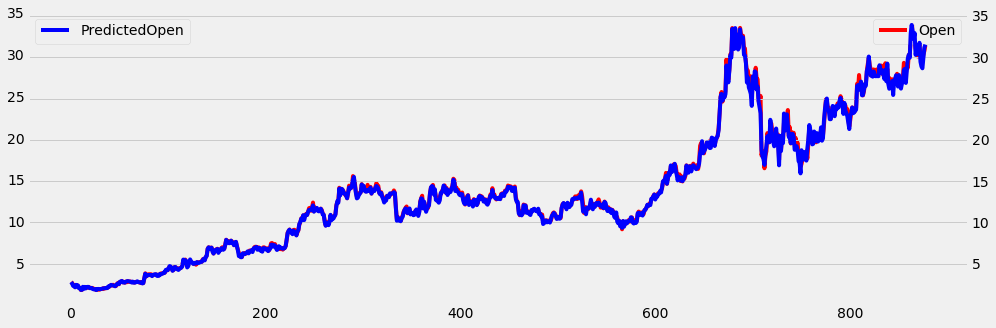

In [54]:
plt.figure(figsize=(15,5))

ax1 = ff_factors.Open.plot(color='red', label='Open')
ax2 = ff_factors.PredictedOpen.plot(color='blue', secondary_y=True, label='PredictedOpen')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

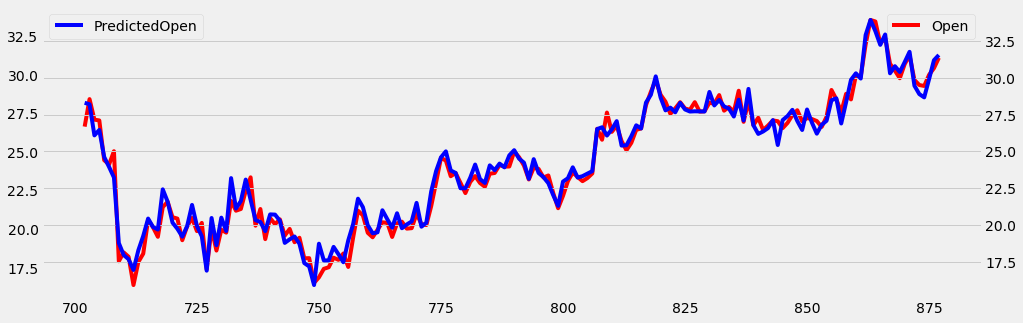

In [55]:
plt.figure(figsize=(15,5))

ax1 = test.Open.plot(color='red', label='Open')
ax2 = test.PredictedOpen.plot(color='blue', secondary_y=True, label='PredictedOpen')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

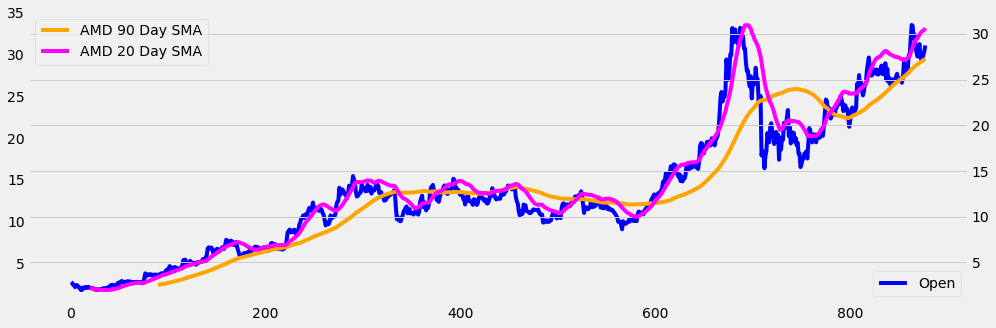

In [56]:
plt.figure(figsize=(15,5))

ax1 = ff_factors.Open.plot(color='blue', label='Open')
#ax2 = ff_factors.PredictedOpen.plot(color='blue', secondary_y=True, label='PredictedOpen')
rolling_mean = ff_factors.Open.rolling(window=90).mean()
ax2 = rolling_mean.plot(color='orange', secondary_y=True, label='AMD 90 Day SMA')
rolling_mean2 = ff_factors.Open.rolling(window=20).mean()
ax3 = rolling_mean2.plot(color='magenta', secondary_y=True, label='AMD 20 Day SMA')

ax1.legend(loc=4)
ax2.legend(loc=2)
#ax3.legend(loc=3)

plt.show()

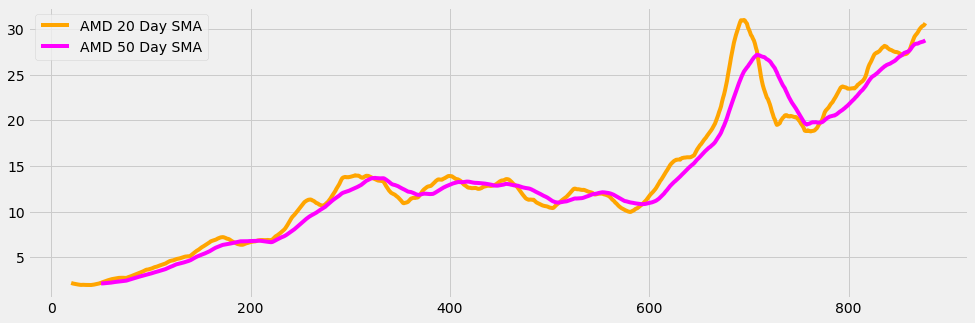

In [57]:
plt.figure(figsize=(15,5))
rolling_mean = ff_factors.Open.rolling(window=20).mean()
rolling_mean2 = ff_factors.Open.rolling(window=50).mean()
#plt.plot(df.ds, df.y, label='AMD')
plt.plot( rolling_mean, label='AMD 20 Day SMA', color='orange')
plt.plot( rolling_mean2, label='AMD 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

#### Multivariate Linear regression

In [1658]:
selected_for_Mutivariate_LR = pd.read_excel(r'.\Data\selected_for_Mutivariate_LR.xlsx')

In [1659]:
selected_for_Mutivariate_LR.head()

ADS_Index_102419
2016-04-01         -0.579355
2016-04-02         -0.570579
2016-04-03         -0.562310
2016-04-04         -0.554354
2016-04-05         -0.547185

In [1660]:
len(amd)

878

In [1661]:
lr_df  = pd.merge(amd, selected_for_Mutivariate_LR, left_index=True, right_index=True)

In [1662]:
lr_df.head()

Open  Close  High   Low    Volume  Open_Close  High_Low  Open_tmr  \
2016-04-01  2.79   2.83  2.88  2.76   8257700       -0.04      0.12      2.83   
2016-04-04  2.83   2.83  2.87  2.80   5591100        0.00      0.07      2.76   
2016-04-05  2.76   2.76  2.84  2.72   9640200        0.00      0.12      2.75   
2016-04-06  2.75   2.80  2.80  2.72  12534600       -0.05      0.08      2.76   
2016-04-07  2.76   2.64  2.83  2.61  13479200        0.12      0.22      2.70   

              log_Vol  Close_tmr  ADS_Index_102419  
2016-04-01  15.926657       2.83         -0.579355  
2016-04-04  15.536687       2.76         -0.554354  
2016-04-05  16.081452       2.80         -0.547185  
2016-04-06  16.344003       2.64         -0.540802  
2016-04-07  16.416658       2.74         -0.535204

In [1663]:
corr = lr_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

In [1689]:
X_train = lr_df[['Open','Open_Close']][:700].values 
y_train = lr_df['Open_tmr'][:700].values
X_test = lr_df[['Open','Open_Close']][700:].values
y_test = lr_df['Open_tmr'][700:].values

In [1690]:
from sklearn import datasets, linear_model, metrics 
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred_linear = model.predict(X_test)

In [1691]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

In [1692]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.921e+05
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:53:38   Log-Likelihood:                -230.68
No. Observations:                 700   AIC:                             465.4
Df Residuals:                     698   BIC:                             474.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0014      0.001   1088.116      0.000       1.000       1.003
x2            -1.1644      0.025    -45.978      0.000      -1.214      -1.115
==============================================================================
Omnibus:                      673.739   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79663.925
Skew:                          -3.890   Prob(JB):                         0.00
Kurtosis:                      54.680   Cond. No.                         27.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1685]:
from sklearn.metrics import mean_squared_error
from math import sqrt


print('RMSE Value : ',sqrt(mean_squared_error(predictions, y_test)) )

RMSE Value :  2.8455345872909126


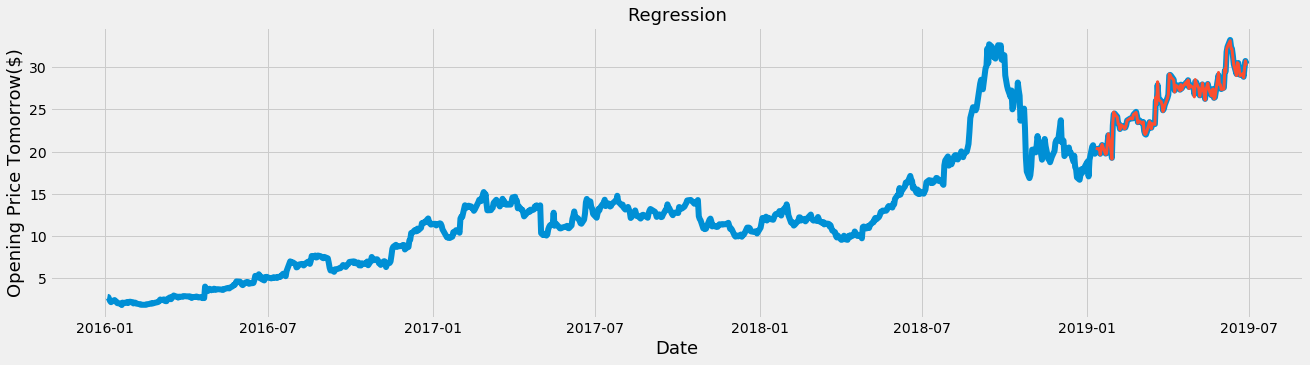

In [1676]:
plt.figure(figsize=(20,5))

# Draw the graph

plt.plot(amd.index.values, amd['Close'], linewidth = 6)
plt.plot(amd.index.values[761:], predictions, linewidth = 3)
plt.xlabel('Date', fontsize=18)
plt.ylabel("Opening Price Tomorrow($)", fontsize=18)
plt.title("Regression", fontsize=18)
plt.show()


In [1686]:
## CHANGING THE PARAMETERS
X_train = lr_df[['Open','Open_Close','High_Low','log_Vol']][:700].values 
y_train = lr_df['Open_tmr'][:700].values
X_test = lr_df[['Open','Open_Close','High_Low','log_Vol']][700:].values
y_test = lr_df['Open_tmr'][700:].values

In [1687]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

In [1688]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.964e+05
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:52:22   Log-Likelihood:                -229.30
No. Observations:                 700   AIC:                             466.6
Df Residuals:                     696   BIC:                             484.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9963      0.003    294.998      0.000       0.990       1.003
x2            -1.1644      0.025    -45.719      0.000      -1.214      -1.114
x3             0.0329      0.037      0.881      0.379      -0.040       0.106
x4             0.0029      0.002      1.580      0.115      -0.001       0.006
==============================================================================
Omnibus:                      669.842   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79907.340
Skew:                          -3.847   Prob(JB):                         0.00
Kurtosis:                      54.773   Cond. No.                         65.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### EMA

In [66]:
Window_size = 60
start_date = 61
total_days = amd.shape[0]
bootstrap_count = 50
y_pred_all = []

In [67]:

def EMA_train(X, Y):
    estimators = []
    # OLS Method implementation yt=beta2*EMA(20)+uhatt        
    invXTX = np.linalg.inv(X.transpose()@X)
    beta_hat = invXTX@X.transpose()@Y
    
    y_hat = X@beta_hat

    
    T= Y.shape[0]        
    N = X.shape[1] 
    
    
    # residuals
    res = Y-y_hat
        
    # variance of error term / residuals
    var = (1/T)*res.transpose()@res  
    std = np.sqrt(var)
    #print(std)
    # variance-covariance matrix of beta_hat
    var_cov_beta = var*invXTX   
    std_cov_beta = np.sqrt(T*np.diag(var_cov_beta))
    
    # t-test statistics
    import scipy.stats as ss
    t_stat = (beta_hat.transpose()-0)/std_cov_beta
    p_val_t = 1-ss.norm.cdf(t_stat)
    #print("t_stat:", t_stat)
    #print("p_val_t:", p_val_t)
           
    # using MSE
    MSE = (sum((Y-y_hat)**2))/(len(X)-len(X[0]))
    var_b = MSE*(np.linalg.inv(np.dot(X.T,X)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = beta_hat/ sd_b
    from scipy import stats
    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(X)-1))) for i in ts_b]
    #print("t_stat:", ts_b)
    #print("p_val_t:", p_values)
    
    #  F-test stats
    f_stat = (beta_hat.transpose()@inv(var_cov_beta)@beta_hat/N)/(res.transpose()@res/(T-N))
    p_val_f = 1-ss.f.cdf(f_stat, N-1, len(X)-N)
    
    #print("f_test: ", f_stat)
    #print("f_test p_val: ", p_val_f)
        
    # R-square
    R2 = 1-T*var/(T*np.var(Y))
    # R2 = 1 - (residuals.transpose()@residuals)/(Y.transpose()@Y)
    # ADJ R2
    R2_adj = 1-(1-R2)*(T-1)/(T-N)
    #print("EWMA model R2: ", R2, R2_adj)
    estimators.append(f_stat)
    estimators.append(R2)
    estimators.append(R2_adj)
    estimators.append(p_val_f)
    return beta_hat, y_hat,estimators;

In [68]:
def ema_bstr():
    yhat_ema = []
    y_test = amd.Open_tmr[0:816]
    # 5 days EMA
    ema_short = amd['Open_tmr'].ewm(span=5, adjust=False).mean()
    
    for i in range(start_date+1, total_days):
        X_train = ema_short[i-Window_size:i-1]
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])        
        X_pred = ema_short[i-1:i]  
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])        
        Y_train = amd['Open_tmr'][i-Window_size:i-1].values
        beta_hat, yhat_fit,est = EMA_train(X_train,Y_train)
        res_fit = Y_train - yhat_fit
        print('beta : ' , beta_hat)
        print('R squared' , est[1])
        print('adjusted R squared' , est[3])      
        # bootstrap method: switching residuals
        y_pred_all = np.zeros(bootstrap_count)
        for boot in range(0, bootstrap_count):
            err = np.random.choice(res_fit, (Window_size-1,), replace=True)
            y_bstr = yhat_fit + err           
            beta_bstr = EMA_train(X_train, y_bstr)[0]            
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[boot]=y_pred_bstr            
        y_pred = y_pred_all.mean() # mean of all bootstrap predictions 
        yhat_ema.append(y_pred)        
    #print(type(ema_short),ema_short)
    #rmse_ema=np.sqrt(np.mean((Y-yhat_ema)**2)) 
    plt.figure(figsize=(20,5))
    plt.plot(amd['Date'][0:816], y_test,linewidth=4, label = 'y_test')
    plt.plot(amd['Date'][0:816],yhat_ema, linewidth=2, label = 'y_pred')
    plt.plot(amd['Date'][0:816],ema_short[0:816], linewidth=2, label = 'EMA 5 days')
    plt.ylabel('PRICE')
    plt.legend()
    plt.show()
    return yhat_ema


beta :  [-0.09668101  1.04389999]
R squared 0.9035641256484575
adjusted R squared 1.1102230246251565e-16
beta :  [-0.12685792  1.05884608]
R squared 0.916044247421666
adjusted R squared 1.1102230246251565e-16
beta :  [-0.13228274  1.06222854]
R squared 0.9246188053137493
adjusted R squared 1.1102230246251565e-16
beta :  [-0.13019302  1.06281369]
R squared 0.937249917517171
adjusted R squared 1.1102230246251565e-16
beta :  [-0.12116983  1.05865158]
R squared 0.9388351837896316
adjusted R squared 1.1102230246251565e-16
beta :  [-0.10783775  1.05234443]
R squared 0.939199162950766
adjusted R squared 1.1102230246251565e-16
beta :  [-0.10456401  1.05139426]
R squared 0.9420546905352081
adjusted R squared 1.1102230246251565e-16
beta :  [-0.09821964  1.04994792]
R squared 0.9483911551111429
adjusted R squared 1.1102230246251565e-16
beta :  [-0.0868036   1.04583826]
R squared 0.952066518447782
adjusted R squared 1.1102230246251565e-16
beta :  [-0.05426205  1.03352795]
R squared 0.9616313291084

beta :  [-0.37783913  1.10292125]
R squared 0.9557620564110075
adjusted R squared 1.1102230246251565e-16
beta :  [-0.37929862  1.10345848]
R squared 0.9595450442976049
adjusted R squared 1.1102230246251565e-16
beta :  [-0.37787197  1.10286435]
R squared 0.9629788758401435
adjusted R squared 1.1102230246251565e-16
beta :  [-0.35251853  1.09690459]
R squared 0.9653370379182308
adjusted R squared 1.1102230246251565e-16
beta :  [-0.26949759  1.0780129 ]
R squared 0.9635350801463114
adjusted R squared 1.1102230246251565e-16
beta :  [-0.16334651  1.05400968]
R squared 0.9574031986035757
adjusted R squared 1.1102230246251565e-16
beta :  [-0.1085113   1.04202912]
R squared 0.956476030932832
adjusted R squared 1.1102230246251565e-16
beta :  [-0.0859985   1.03721558]
R squared 0.9569691091681044
adjusted R squared 1.1102230246251565e-16
beta :  [-0.06456164  1.03316562]
R squared 0.9577351621140613
adjusted R squared 1.1102230246251565e-16
beta :  [-0.05626603  1.03146538]
R squared 0.9583904897

beta :  [-0.30301396  1.04311714]
R squared 0.7839768774635735
adjusted R squared 1.1102230246251565e-16
beta :  [-0.90337867  1.13368218]
R squared 0.7724962652870868
adjusted R squared 1.1102230246251565e-16
beta :  [-1.37170738  1.20373887]
R squared 0.7963859155155624
adjusted R squared 1.1102230246251565e-16
beta :  [-1.68520179  1.25071029]
R squared 0.8318494253287051
adjusted R squared 1.1102230246251565e-16
beta :  [-1.58183843  1.235642  ]
R squared 0.8513223871296886
adjusted R squared 1.1102230246251565e-16
beta :  [-1.49885948  1.22397798]
R squared 0.8729062738081236
adjusted R squared 1.1102230246251565e-16
beta :  [-1.31096069  1.19613964]
R squared 0.8812643307763535
adjusted R squared 1.1102230246251565e-16
beta :  [-1.23309534  1.18466358]
R squared 0.8932601026261084
adjusted R squared 1.1102230246251565e-16
beta :  [-1.15976081  1.17454358]
R squared 0.9072329209681672
adjusted R squared 1.1102230246251565e-16
beta :  [-1.02517836  1.15573108]
R squared 0.919038918

R squared 0.9209979371342969
adjusted R squared 1.1102230246251565e-16
beta :  [-0.31927583  1.03248665]
R squared 0.9219602961355507
adjusted R squared 1.1102230246251565e-16
beta :  [-0.37202767  1.03605343]
R squared 0.9251804780420421
adjusted R squared 1.1102230246251565e-16
beta :  [-0.27425685  1.02796543]
R squared 0.9234064886243412
adjusted R squared 1.1102230246251565e-16
beta :  [-0.26690024  1.02713347]
R squared 0.9235717823308223
adjusted R squared 1.1102230246251565e-16
beta :  [-0.23515379  1.02466368]
R squared 0.9235035084687349
adjusted R squared 1.1102230246251565e-16
beta :  [-0.21019264  1.0226653 ]
R squared 0.9232646757477614
adjusted R squared 1.1102230246251565e-16
beta :  [-0.20963328  1.02293198]
R squared 0.923344387059582
adjusted R squared 1.1102230246251565e-16
beta :  [-0.22879069  1.02518028]
R squared 0.9232392480136168
adjusted R squared 1.1102230246251565e-16
beta :  [-0.21579334  1.02428792]
R squared 0.9233360665293407
adjusted R squared 1.110223

beta :  [-1.10561755  1.09324721]
R squared 0.8365430860993932
adjusted R squared 1.1102230246251565e-16
beta :  [-0.96372233  1.08077636]
R squared 0.8339789025083616
adjusted R squared 1.1102230246251565e-16
beta :  [-0.92102187  1.07701537]
R squared 0.8353702485148219
adjusted R squared 1.1102230246251565e-16
beta :  [-0.86855972  1.07236106]
R squared 0.8361360017826743
adjusted R squared 1.1102230246251565e-16
beta :  [-0.84297883  1.07009641]
R squared 0.8373604539106904
adjusted R squared 1.1102230246251565e-16
beta :  [-0.83237163  1.06910742]
R squared 0.8391329376643386
adjusted R squared 1.1102230246251565e-16
beta :  [-0.91047531  1.07593914]
R squared 0.8433630892334982
adjusted R squared 1.1102230246251565e-16
beta :  [-1.20580088  1.10257775]
R squared 0.8659486418950432
adjusted R squared 1.1102230246251565e-16
beta :  [-1.1512154   1.10074236]
R squared 0.8974035982131503
adjusted R squared 1.1102230246251565e-16
beta :  [-0.81258519  1.0735846 ]
R squared 0.900256038

beta :  [-1.56074531  1.11871853]
R squared 0.8306073675795634
adjusted R squared 1.1102230246251565e-16
beta :  [-1.57137327  1.11971295]
R squared 0.8392702631224023
adjusted R squared 1.1102230246251565e-16
beta :  [-1.55033965  1.11821489]
R squared 0.8469858277108022
adjusted R squared 1.1102230246251565e-16
beta :  [-1.5318378   1.11698495]
R squared 0.8551477038265267
adjusted R squared 1.1102230246251565e-16
beta :  [-1.46528707  1.11211435]
R squared 0.8622023295449766
adjusted R squared 1.1102230246251565e-16
beta :  [-1.40615233  1.10726567]
R squared 0.8693689521166617
adjusted R squared 1.1102230246251565e-16
beta :  [-1.27960585  1.09752427]
R squared 0.8722284286923694
adjusted R squared 1.1102230246251565e-16
beta :  [-1.14237743  1.08701504]
R squared 0.8733078889705104
adjusted R squared 1.1102230246251565e-16
beta :  [-1.02457435  1.07835927]
R squared 0.8757094227468618
adjusted R squared 1.1102230246251565e-16
beta :  [-0.95640496  1.07324299]
R squared 0.877729206

beta :  [0.61627649 0.95269638]
R squared 0.8097100200299274
adjusted R squared 1.1102230246251565e-16
beta :  [0.43944788 0.96690647]
R squared 0.7997437033458556
adjusted R squared 1.1102230246251565e-16
beta :  [0.15077947 0.99040548]
R squared 0.8003399100987023
adjusted R squared 1.1102230246251565e-16
beta :  [-0.09169163  1.01006487]
R squared 0.8010719233906577
adjusted R squared 1.1102230246251565e-16
beta :  [-0.21485339  1.02002228]
R squared 0.797490441628664
adjusted R squared 1.1102230246251565e-16
beta :  [-0.2663676   1.02405821]
R squared 0.7900134685685749
adjusted R squared 1.1102230246251565e-16
beta :  [-0.14512094  1.01398511]
R squared 0.7777538592536439
adjusted R squared 1.1102230246251565e-16
beta :  [-0.16022283  1.01506848]
R squared 0.7657667158474561
adjusted R squared 1.1102230246251565e-16
beta :  [-0.34598956  1.03019521]
R squared 0.7589235131628147
adjusted R squared 1.1102230246251565e-16
beta :  [-0.60805377  1.05164851]
R squared 0.7570534474786949

beta :  [0.3581423  0.98672535]
R squared 0.9799917928318472
adjusted R squared 1.1102230246251565e-16
beta :  [0.27510477 0.99405132]
R squared 0.9779086391960918
adjusted R squared 1.1102230246251565e-16
beta :  [0.26920959 0.99521252]
R squared 0.9774376179320877
adjusted R squared 1.1102230246251565e-16
beta :  [0.28785452 0.99369664]
R squared 0.9770529568474813
adjusted R squared 1.1102230246251565e-16
beta :  [0.2730702  0.99475601]
R squared 0.9768625190633988
adjusted R squared 1.1102230246251565e-16
beta :  [0.30373216 0.99298783]
R squared 0.9766585367867141
adjusted R squared 1.1102230246251565e-16
beta :  [0.39045718 0.98690757]
R squared 0.9763280198058771
adjusted R squared 1.1102230246251565e-16
beta :  [0.46730682 0.98160671]
R squared 0.9758577766802011
adjusted R squared 1.1102230246251565e-16
beta :  [0.49847362 0.97989329]
R squared 0.9752675750937042
adjusted R squared 1.1102230246251565e-16
beta :  [0.59736123 0.97318158]
R squared 0.9746736803629282
adjusted R s

beta :  [-0.61155762  1.02373421]
R squared 0.9150474479339903
adjusted R squared 1.1102230246251565e-16
beta :  [-0.47682733  1.01916976]
R squared 0.9127127269394018
adjusted R squared 1.1102230246251565e-16
beta :  [-0.36706217  1.01550436]
R squared 0.9104946047777313
adjusted R squared 1.1102230246251565e-16
beta :  [-0.30435614  1.01334947]
R squared 0.9092059642037189
adjusted R squared 1.1102230246251565e-16
beta :  [-0.34288636  1.01467938]
R squared 0.9085363745779997
adjusted R squared 1.1102230246251565e-16
beta :  [-0.52613466  1.02094897]
R squared 0.9086589990331251
adjusted R squared 1.1102230246251565e-16
beta :  [-0.59081396  1.02317247]
R squared 0.9089204620791029
adjusted R squared 1.1102230246251565e-16
beta :  [-0.66694772  1.02576817]
R squared 0.9098254796605394
adjusted R squared 1.1102230246251565e-16
beta :  [-0.9248551   1.03438614]
R squared 0.9143085208201088
adjusted R squared 1.1102230246251565e-16
beta :  [-1.12374275  1.04056361]
R squared 0.921294365

beta :  [-0.57259937  1.03127444]
R squared 0.9183624096508632
adjusted R squared 1.1102230246251565e-16
beta :  [-0.56123776  1.03099904]
R squared 0.9189914678547872
adjusted R squared 1.1102230246251565e-16
beta :  [-0.44230631  1.02588735]
R squared 0.9199744773727624
adjusted R squared 1.1102230246251565e-16
beta :  [-0.38904685  1.02363804]
R squared 0.9200236102684245
adjusted R squared 1.1102230246251565e-16
beta :  [-0.18143608  1.01496825]
R squared 0.9220911428984957
adjusted R squared 1.1102230246251565e-16
beta :  [-0.37730132  1.0261792 ]
R squared 0.9153336380804387
adjusted R squared 1.1102230246251565e-16
beta :  [-0.03168732  1.01205541]
R squared 0.9193333222372277
adjusted R squared 1.1102230246251565e-16
beta :  [-0.13801259  1.01884619]
R squared 0.9162216570587772
adjusted R squared 1.1102230246251565e-16
beta :  [-0.0120412   1.01339925]
R squared 0.9149769123180355
adjusted R squared 1.1102230246251565e-16
beta :  [0.03637072 1.01154321]
R squared 0.91383716292

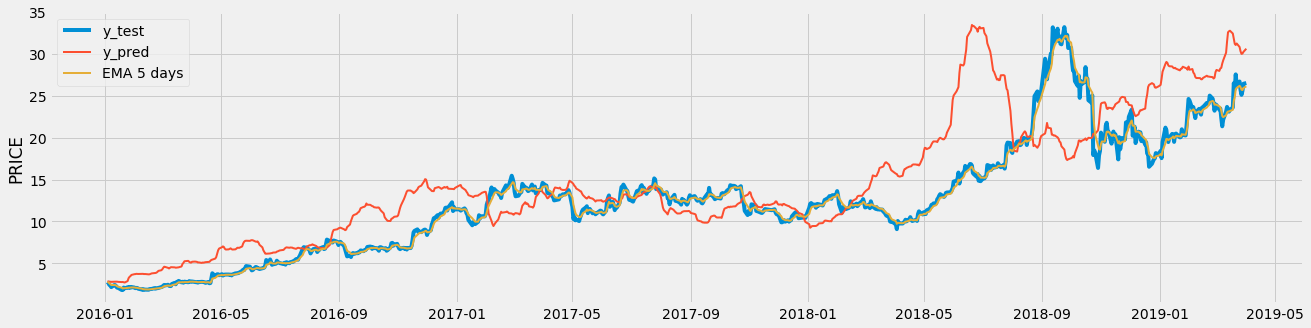

In [69]:
predictions_ema = ema_bstr()

#### SVM

In [70]:
X_train = amd[['Open','Open_Close','High_Low','log_Vol']][:700].values
y_train = amd[['Open_tmr']][:700].values
X_test = amd[['Open','Open_Close','High_Low','log_Vol']][700:].values
y_test = amd[['Open_tmr']][700:].values

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



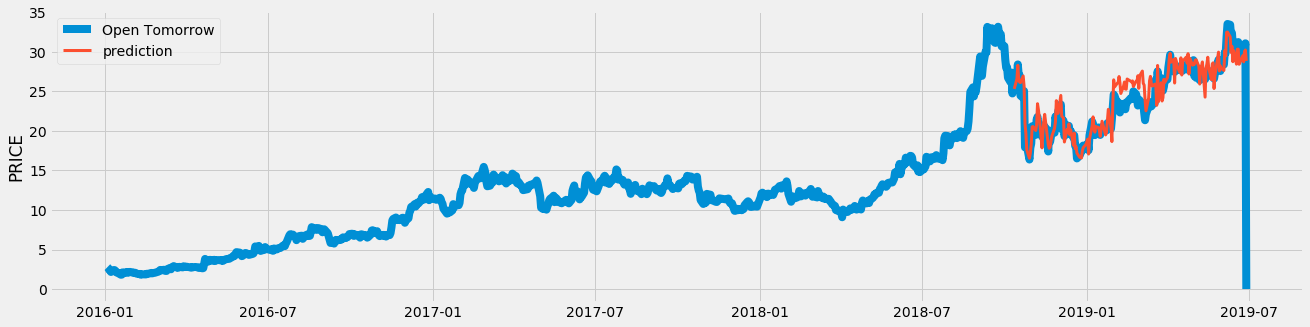

In [71]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train, y_train)
y_pred_svm = svr_rbf.predict(X_test)
plt.figure(figsize=(20,5))
plt.plot(amd['Date'][:],amd['Open_tmr'][:], linewidth=8, label = 'Open Tomorrow')
plt.plot(amd['Date'][700:], y_pred_svm, linewidth=3, label = 'prediction')
plt.ylabel('PRICE')
plt.legend()
plt.show()

In [72]:
svr_rbf

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [76]:
root_mean_sq_error = sqrt(mean_squared_error(y_test, y_pred_svm))
print('Root Mean Squared Error : ', root_mean_sq_error)

Root Mean Squared Error :  2.617532175293234


In [77]:
svr_rbf

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### ARIMA Model
- ARIMA stands for Auto-Regressive Integrated Moving Averages
- The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation

##### The predictors depend on the parameters (p,d,q) of the ARIMA model
- Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5)


- Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value


- Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results

##### Determining the value of p, q
- Autocorrelation Function (ACF)
- Partial Autocorrelation Function (PACF)

In [78]:
from statsmodels.tsa.arima_model import ARIMA

#size = int(len(amd.Open_tmr) * 0.79)
train, test = amd.Open_tmr[0:700], amd.Open_tmr[700:]

history = [x for x in train]
predictions_ARIMA = list()
for t in range(700,701 + len(test) - 1):
    model = ARIMA(history, order=(7,1,1)) ## as shown above
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_ARIMA.append(yhat)
    obs = test[t]
    history.append(test[t])
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  876
Model:                 ARIMA(7, 1, 1)   Log Likelihood                -875.420
Method:                       css-mle   S.D. of innovations              0.657
Date:                Thu, 05 Dec 2019   AIC                           1770.840
Time:                        21:07:55   BIC                           1818.594
Sample:                             1   HQIC                          1789.106
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0324      0.019      1.682      0.093      -0.005       0.070
ar.L1.D.y     -0.8195      0.093     -8.809      0.000      -1.002      -0.637
ar.L2.D.y     -0.0174      0.046     -0.383      0.702      -0.107       0.072
ar.L3.D.y      0.0911      0.044      2.060      0.040       0.004       0.178
ar.L4.D.y     -0.0223      0.044     -0.509      0.611      -0.108       0.063
ar.L5.D.y     -0.0229      0.044     -0.521      0.603      -0.109       0.063
ar.L6.D.y     -0.0260      0.044     -0.595      0.552      -0.112       0.060
ar.L7.D.y     -0.1202      0.035     -3.391      0.001      -0.190      -0.051
ma.L1.D.y      0.6810      0.089      7.646      0.000       0.506       0.856
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1265           -0.0000j            1.1265           -0.5000
AR.2           -0.9439           -0.7999j            1.2373           -0.3881
AR.3           -0.9439           +0.7999j            1.2373            0.3881
AR.4            1.2879           -0.6951j            1.4635           -0.0788
AR.5            1.2879           +0.6951j            1.4635            0.0788
AR.6            0.1113           -1.4968j            1.5009           -0.2382
AR.7            0.1113           +1.4968j            1.5009            0.2382
MA.1           -1.4685           +0.0000j            1.4685            0.5000
-----------------------------------------------------------------------------
"""

In [79]:
print(len(predictions_ARIMA))

178


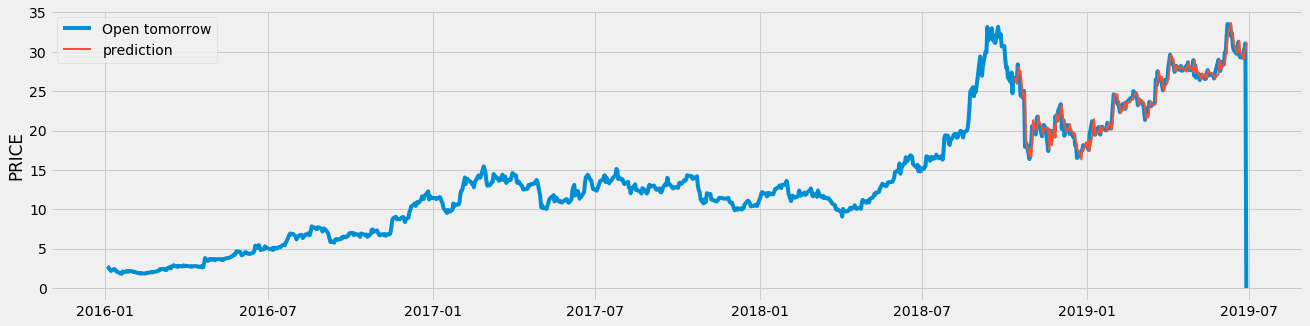

In [80]:
plt.figure(figsize=(20,5))
plt.plot(amd['Date'][:].values, amd['Open_tmr'][:].values, linewidth=4, label = 'Open tomorrow')
plt.plot(amd['Date'][700:].values,predictions_ARIMA, linewidth=2, label = 'prediction')
plt.ylabel('PRICE')
plt.legend()
plt.show()

In [81]:
root_mean_sq_error = sqrt(mean_squared_error(amd['Open_tmr'][700:].values, predictions_ARIMA))
print('Root Mean Squared Error : ', root_mean_sq_error)

Root Mean Squared Error :  2.5958901393284117


## Kalman Filter

In [82]:
param0=[2.3, 1.7,1.8,1.9]

def kf_train(Y):
    Y = transpose(array(Y))
    T = Y.shape[0]
    
    # initial values
    x_init = np.array([[100], [0.01]]) # two states: stock price, percentage change in stock price
    P_init = 900 * np.eye(len(x_init))  

    # 2x2 identity matrix
    Idn = np.eye(2)

    # allocate result matrices
    x_predict = np /.zeros((T, 2, 1))      # prediction of state vector
    P_predict = np.zeros((T, 2, 2))  # prediction error covariance matrix
    x_update = np.zeros((T, 2, 1))       # estimation of state vector
    P_update = np.zeros((T, 2, 2))   # estimation error covariance matrix


    K = np.zeros((T, 2, 1))       # Kalman Gain
    v = np.zeros((T, 1, 1))  # error of estimate
    F = np.zeros((T, 1, 1))

    # initial x
    x_update[0] = x_init
    P_update[0] = P_init
    x_predict[0] = x_init
    P_predict[0] = P_init
    
    q= param0[0]
    r= param0[1]

    # matrices
    t = 1
    A = array([[1, t], [0, 1]])
    Q = q*array([[1, 0], [0, 1]])
    H = array([1, 0])
    H.shape = (1, 2)
    R = r*1

    for i in range(T):
        # prediction stage
        if i > 0:
            x_predict[i] = A @ x_update[i-1]
            P_predict[i] = A @ P_update[i-1] @ transpose(A) + Q

        # estimation stage
        v[i] = Y[i] - H @ A @ x_update[i-1]
        F[i] = H @ P_predict[i] @ transpose(H) + R

        K[i] = P_predict[i] @ transpose(H) @ inv((H @ P_predict[i] @ transpose(H)) + R)
        
        x_update[i] = x_predict[i] + K[i] @ v[i] 
        P_update[i] = (Idn - K[i] @ H) @ P_predict[i]
                
    "smoother"
    L = np.zeros((T,2,2))

    x_smooth = np.zeros((T, 2, 1))      
    P_smooth = np.zeros((T, 2, 2)) 

    x_smooth[T-1] = x_update[T-1]
    P_smooth[T-1] = P_update[T-1]  
    
    
    for t in range(T-1,0,-1): #range(start, stop, step)
        L[t-1] = P_update[t-1] @ transpose(A) @ inv(P_predict[t-1]) 
        x_smooth[t-1] = x_update[t-1] + L[t-1] @ (x_smooth[t]-A @ x_update[t])
        P_smooth[t-1] = P_update[t-1] + L[t-1] @ (P_smooth[t]-P_update[t]) @ transpose(L[t-1])
     

    x_update.shape=(Y.shape[0],2,)
    x_smooth.shape=(Y.shape[0],2,)
    
    #one step forward prediction
    y_pred = A @ x_smooth[T-1]
    
    return x_smooth[:, 0], y_pred[0]

In [83]:
def kf_bstr():
    yhat_kf = np.zeros(total_days-(start_date+1))
    for t in range(start_date+1, total_days):    
        Y_train = amd['Open_tmr'][t-Window_size:t-1].values
        yhat_fit = kf_train(Y_train)[0]
        res_fit = Y_train - yhat_fit
        
        # bootstrap method: switching residuals
        y_pred_all = np.zeros(bootstrap_count)
        for i in range(0, bootstrap_count):
            err = np.random.choice(res_fit, (Window_size-1,), replace=True)
            y_bstr = yhat_fit + err                
            y_pred_bstr = kf_train(y_bstr)[1]
            y_pred_all[i]=y_pred_bstr            
        if t%100 ==0:
            print("kalman t:", t)    
        y_pred = y_pred_all.mean()
        yhat_kf[t-(start_date+1)]=y_pred
    
    #rmse_kf=np.sqrt(np.mean((Y-yhat_kf)**2))
    return yhat_kf# , rmse_kf

In [84]:
prediction_kf= kf_bstr()

kalman t: 100
kalman t: 200
kalman t: 300
kalman t: 400
kalman t: 500
kalman t: 600
kalman t: 700
kalman t: 800


In [85]:
y_test = amd.Open_tmr[0:816]

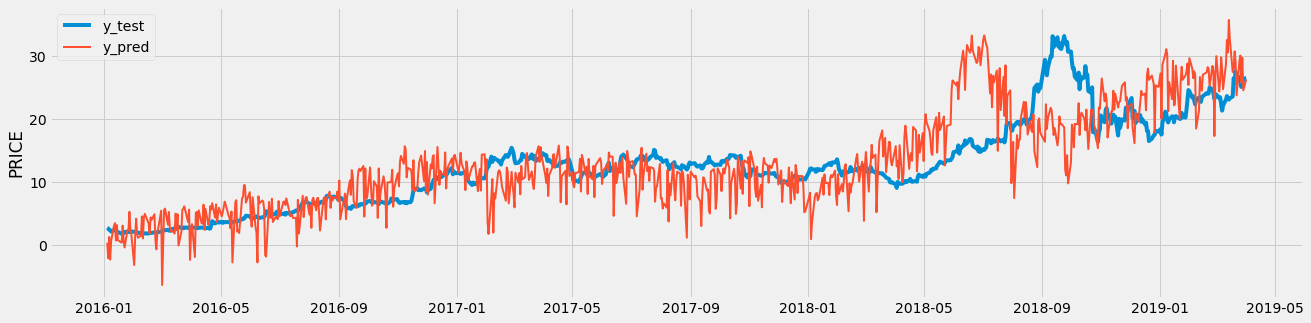

In [86]:
plt.figure(figsize=(20,5))
plt.plot(amd['Date'][0:816], y_test,linewidth=4, label = 'y_test')
plt.plot(amd['Date'][0:816],prediction_kf, linewidth=2, label = 'y_pred')
plt.ylabel('PRICE')
plt.legend()
plt.show()

## Random Forest

In [87]:
df_bagging = pd.DataFrame()
df_bagging['Date'] = amd['Date'][-178:].tolist()
df_bagging['open_tomorrow'] = amd['Open_tmr'].tail(178).values
df_bagging['Linear_reg'] = y_pred_linear[-178:]
df_bagging['ARIMA'] = predictions_ARIMA
df_bagging['SVM'] = y_pred_svm[-178:].tolist()
df_bagging['EMA'] = predictions_ema[-178:]
df_bagging['KF'] = prediction_kf[-178:]

In [90]:
new = []
for i in df_bagging.ARIMA.tolist():
    i = str(i)
    new.append(i[1:8])
df_bagging['ARIMA'] = new
df_bagging['ARIMA'] = df_bagging['ARIMA'].astype(float)

In [91]:
df_bagging.dtypes

Date             datetime64[ns]
open_tomorrow           float64
Linear_reg              float64
ARIMA                   float64
SVM                     float64
EMA                     float64
KF                      float64
dtype: object

In [92]:
a = df_bagging['ARIMA']
b = df_bagging['SVM']
c = df_bagging['Linear_reg']
d = df_bagging['EMA']
e = df_bagging['KF']
f = df_bagging['open_tomorrow']
g = []

minimum_diff = pd.DataFrame([a, b,c,d,e]).min()

Y_bagging = np.zeros(df_bagging.shape[0])

for t in range(0, len(df_bagging)):
    if min(abs(a[t]-f[t]),abs(b[t]-f[t]),abs(c[t]-f[t]),abs(d[t]-f[t]),abs(e[t]-f[t])) == abs(a[t]-f[t]):
        Y_bagging[t] = a[t]
        g.append('ARIMA')
    elif min(abs(a[t]-f[t]),abs(b[t]-f[t]),abs(c[t]-f[t]),abs(d[t]-f[t]), abs(e[t]-f[t]))== abs(b[t]-f[t]):
        Y_bagging[t] = b[t]
        g.append('SVM')
    elif min(abs(a[t]-f[t]),abs(b[t]-f[t]),abs(c[t]-f[t]),abs(d[t]-f[t]),abs(e[t]-f[t])) == abs(c[t]-f[t]):
        Y_bagging[t] = c[t] 
        g.append('LR')
    elif min(abs(a[t]-f[t]),abs(b[t]-f[t]),abs(c[t]-f[t]),abs(d[t]-f[t]),abs(e[t]-f[t])) == abs(d[t]-f[t]):
        Y_bagging[t] = d[t]   
        g.append('EMA')
    else:
        Y_bagging[t] = e[t] 
        g.append('Kalman Filter')

df_bagging['model'] = g

In [93]:
df_bagging.tail()

Date  open_tomorrow  Linear_reg    ARIMA        SVM        EMA  \
173 2019-06-24          29.26   29.245350  29.5505  29.501900  30.302892   
174 2019-06-25          29.98   28.816088  29.0663  28.737681  29.987839   
175 2019-06-26          30.41   29.902821  30.0893  30.048501  30.027357   
176 2019-06-27          31.08   30.773297  30.2227  30.234304  30.224776   
177 2019-06-28           0.00   30.269092  31.2076  28.850991  30.607733   

            KF          model  
173  30.087497             LR  
174  25.802956            EMA  
175  29.727089          ARIMA  
176  24.557084             LR  
177  26.292177  Kalman Filter

In [94]:
df_bagging['model'].value_counts()

LR               76
EMA              36
ARIMA            32
SVM              18
Kalman Filter    16
Name: model, dtype: int64

In [95]:
df_bagging['Average_value'] = (df_bagging['ARIMA'] + df_bagging['Linear_reg'])/2

In [126]:
df_bagging.head()

Date  open_tomorrow  Linear_reg    ARIMA        SVM        EMA  \
0 2018-10-12      26.379999   26.337946  26.7891  25.311861  27.005639   
1 2018-10-15      26.629999   26.272016  25.9349  26.578688  26.850136   
2 2018-10-16      28.410000   28.487644  27.2385  28.304104  26.871339   
3 2018-10-17      27.080000   27.226765  28.0358  26.517592  27.434834   
4 2018-10-18      27.030001   26.612935  27.1765  26.172881  27.454998   

          KF  model  Average_value  
0  14.977228     LR      26.563523  
1  25.722284    SVM      26.103458  
2  28.088556     LR      27.863072  
3  21.442222     LR      27.631283  
4  26.721517  ARIMA      26.894717

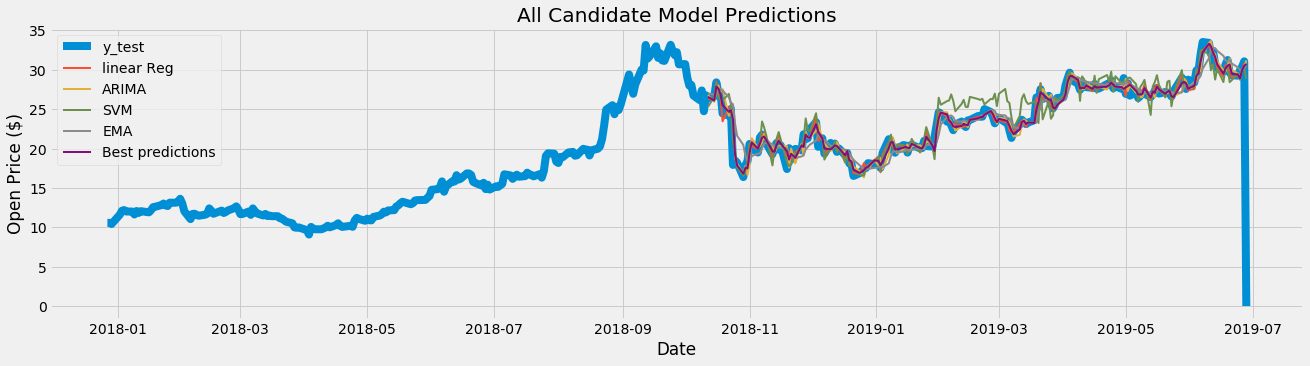

In [97]:
plt.figure(figsize=(20,5))
plt.plot(amd['Date'][500:].values, amd['Open_tmr'][500:].values, linewidth=8, label = 'y_test')
plt.plot(df_bagging['Date'].values, df_bagging['Linear_reg'].values, linewidth=2, label = 'linear Reg')
plt.plot(df_bagging['Date'].values, df_bagging['ARIMA'].values, linewidth=2, label = 'ARIMA')
plt.plot(df_bagging['Date'].values, df_bagging['SVM'].values, linewidth=2, label = 'SVM')
plt.plot(df_bagging['Date'].values, df_bagging['EMA'].values, linewidth=2, label = 'EMA')
plt.plot(df_bagging['Date'].values, df_bagging['Average_value'].values, linewidth=2, label = 'Best predictions')
plt.xlabel('Date')
plt.ylabel('Open Price ($)')
plt.title('All Candidate Model Predictions')
plt.legend()
plt.show()

## TRADING STRATERGY FOR PORTFOLIO

In [1528]:
df_position = pd.DataFrame()
df_position['open'] = df_bagging['open_tomorrow'].tolist()
df_position['Average_value'] = df_bagging['Average_value'].tolist()
close = amd['Close_tmr'].tolist()
df_position['close'] = close[-len(df_position):]

In [1529]:
# Day Trading Strategy

df_position['signal_day_trade'] = np.where(df_position['Average_value'] > df_position['open'], 1, -1)
df_position['position_day_trade'] = df_position['signal_day_trade']

In [1530]:
# Buy Hold Trading Stratergy

signal_long_short = np.zeros(len(df_bagging))
position_long_short= np.zeros(len(df_bagging))

signal_buy_hold = [-1] * len(df_position)
signal_buy_hold[0] = 1
df_position['signal_buy_hold'] = signal_buy_hold
df_position['position_buy_hold'] = signal_buy_hold

In [1531]:
# Buy Hold Trading Stratergy

signal_long_short = np.zeros(len(df_bagging))
position_long_short= np.zeros(len(df_bagging))

df_position['signal_long_short'] = np.where(df_position['Average_value'] > df_position['open'], 1, -1)

for i in range(0, len(df_bagging)):
    if i == 0:
        position_long_short[i] = df_position['signal_long_short'][i]   
    elif df_position['signal_long_short'][i] != df_position['signal_long_short'][i-1]:
        position_long_short[i] = df_position['signal_long_short'][i]
        
df_position['position_long_short'] = position_long_short.tolist()
df_position['Date'] = df_bagging.Date.tolist()
df_position.set_index('Date', inplace = True)

In [1532]:
df_position.head()

open  Average_value      close  signal_day_trade  \
Date                                                                
2018-10-12  26.379999      26.563523  26.260000                 1   
2018-10-15  26.629999      26.103458  28.180000                -1   
2018-10-16  28.410000      27.863072  27.299999                -1   
2018-10-17  27.080000      27.631283  26.620001                 1   
2018-10-18  27.030001      26.894717  23.660000                -1   

            position_day_trade  signal_buy_hold  position_buy_hold  \
Date                                                                 
2018-10-12                   1                1                  1   
2018-10-15                  -1               -1                 -1   
2018-10-16                  -1               -1                 -1   
2018-10-17                   1               -1                 -1   
2018-10-18                  -1               -1                 -1   

            signal_long_short  position_long_short  
Date                                                
2018-10-12                  1                  1.0  
2018-10-15                 -1                 -1.0  
2018-10-16                 -1                  0.0  
2018-10-17                  1                  1.0  
2018-10-18                 -1                 -1.0

## PORTFOLIO =================================================================

#### Day Trade

In [1533]:
initial_money_day_trade = 50000
shares = 500

position_day_trade = df_position['position_day_trade'].values.tolist()
close = df_position['close'].values.tolist()
open = df_position['open'].values.tolist()
day_trade_fund_remaining= np.zeros(len(df_position))

for i in range(0, len(df_position)-1):
    day_trade_fund_remaining[i] = initial_money_day_trade - position_day_trade[i] * shares * open[i] + position_day_trade[i] * shares * close[i]
    initial_money_day_trade = day_trade_fund_remaining[i]
    
df_position['day_trade_fund_remaining'] = day_trade_fund_remaining

#### Long Short

In [1534]:
initial_money_long_short = 50000
shares = 500

position_long_short = df_position['position_long_short'].values.tolist()
close = df_position['close'].values.tolist()
open = df_position['open'].values.tolist()
long_short_fund_remaining= np.zeros(len(df_position))

for i in range(0, len(df_position)-1):
    long_short_fund_remaining[i] = initial_money_long_short - position_long_short[i] * shares * open[i] + position_long_short[i] * shares * close[i]
    initial_money_long_short = long_short_fund_remaining[i]

        
df_position['long_short_fund_remaining'] = long_short_fund_remaining

#### Buy Hold

In [1535]:
buy_hold_balance_trade = 50000
shares = 500

position_buy_hold = df_position['position_buy_hold'].values.tolist()
close = df_position['close'].values.tolist()
open = df_position['open'].values.tolist()
buy_hold_fund_remaining= np.zeros(len(df_position))

for i in range(0, len(df_position)-1):
    if i == 0:
        buy_hold_fund_remaining[i] = buy_hold_balance_trade - position_buy_hold[i] * shares * open[i]
        buy_hold_balance_trade = buy_hold_fund_remaining[i]
    else:
        buy_hold_fund_remaining[i] = buy_hold_balance_trade + position_buy_hold[0]  * shares * close[i]

df_position['buy_hold_fund_remaining'] = buy_hold_fund_remaining

In [1536]:
df_position.head(100)

open  Average_value      close  signal_day_trade  \
Date                                                                
2018-10-12  26.379999      26.563523  26.260000                 1   
2018-10-15  26.629999      26.103458  28.180000                -1   
2018-10-16  28.410000      27.863072  27.299999                -1   
2018-10-17  27.080000      27.631283  26.620001                 1   
2018-10-18  27.030001      26.894717  23.660000                -1   
2018-10-19  24.459999      25.501362  25.030001                 1   
2018-10-22  24.180000      24.670006  25.090000                 1   
2018-10-23  25.040001      24.861721  22.790001                -1   
2018-10-24  17.920000      23.713958  19.270000                 1   
2018-10-25  18.490000      19.227875  17.629999                 1   
2018-10-26  18.209999      17.853862  16.850000                -1   
2018-10-29  16.379999      16.815372  17.200001                 1   
2018-10-30  17.870001      17.571239  18.209999                -1   
2018-10-31  18.410000      17.478983  20.219999                -1   
2018-11-01  20.590000      19.402762  20.230000                -1   
2018-11-02  20.120001      20.796321  19.900000                 1   
2018-11-05  19.500000      20.005935  20.680000                 1   
2018-11-06  21.420000      20.635202  21.840000                -1   
2018-11-07  21.770000      21.365130  21.200001                -1   
2018-11-08  20.770000      21.531165  21.030001                 1   
2018-11-09  20.680000      21.101587  19.030001                 1   
2018-11-12  19.280001      19.694910  19.610001                 1   
2018-11-13  20.180000      19.583767  20.809999                -1   
2018-11-14  20.719999      20.497747  21.490000                -1   
2018-11-15  19.870001      20.977587  20.660000                 1   
2018-11-16  20.400000      20.614443  19.110001                 1   
2018-11-19  17.400000      19.663292  19.209999                 1   
2018-11-20  20.049999      18.596325  18.730000                -1   
2018-11-21  18.610001      19.338941  19.379999                 1   
2018-11-23  19.959999      18.832242  20.080000                -1   
...               ...            ...        ...               ...   
2019-01-25  20.320000      21.518811  20.180000                 1   
2019-01-28  20.260000      20.395897  19.250000                 1   
2019-01-29  21.490000      19.690955  23.090000                -1   
2019-01-30  23.020000      22.364473  24.410000                -1   
2019-01-31  24.610001      23.833967  24.510000                -1   
2019-02-01  24.430000      24.563775  24.129999                 1   
2019-02-04  23.420000      24.354252  23.309999                 1   
2019-02-05  23.629999      23.585624  23.260000                -1   
2019-02-06  22.990000      23.326980  22.670000                 1   
2019-02-07  22.330000      22.828620  23.049999                 1   
2019-02-08  23.049999      22.737545  22.959999                -1   
2019-02-11  23.430000      22.859292  22.820000                -1   
2019-02-12  22.980000      23.148876  22.850000                 1   
2019-02-13  22.740000      23.020749  23.129999                 1   
2019-02-14  23.580000      22.957383  23.680000                -1   
2019-02-15  23.629999      23.642260  23.950001                 1   
2019-02-19  24.139999      23.843668  23.950001                -1   
2019-02-20  24.040001      24.008474  23.920000                -1   
2019-02-21  24.049999      23.994849  24.360001                -1   
2019-02-22  25.010000      24.288058  24.709999                -1   
2019-02-25  24.650000      24.769690  24.209999                 1   
2019-02-26  24.110001      24.437996  23.480000                 1   
2019-02-27  23.209999      23.872375  23.530001                 1   
2019-02-28  23.969999      23.365994  23.680000                -1   
2019-03-01  23.889999      23.784322  23.370001                -1   
2019-03-04  23.

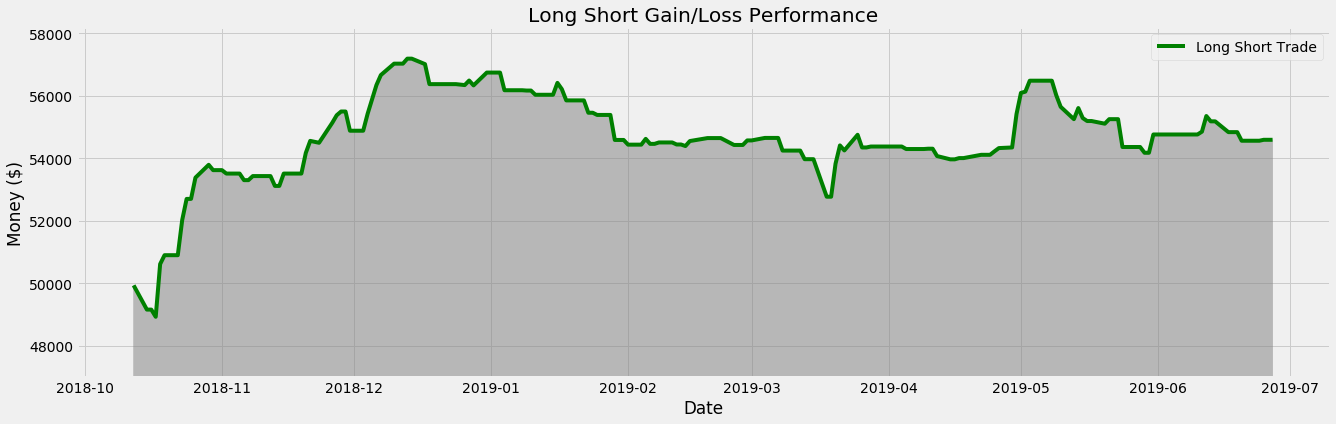

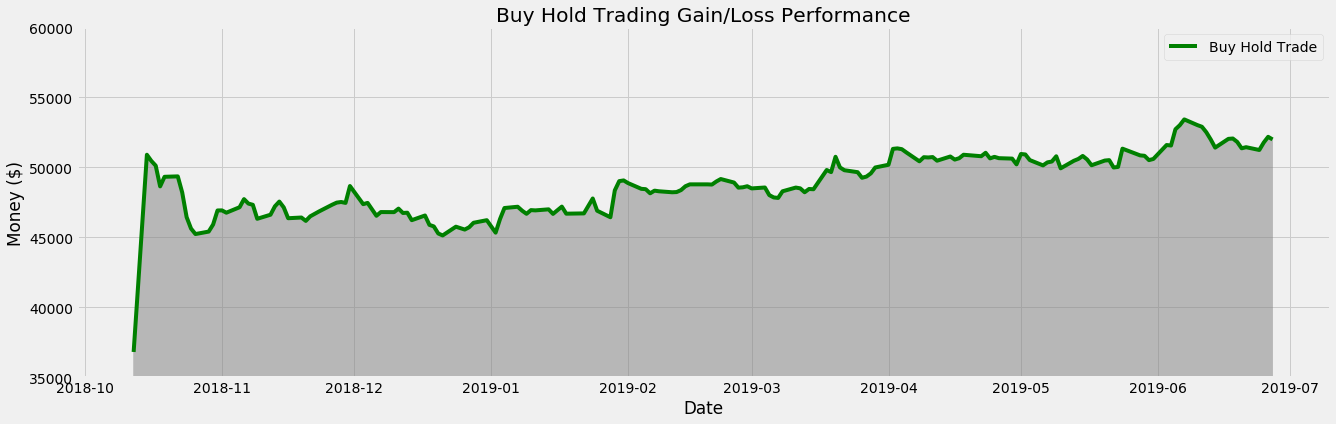

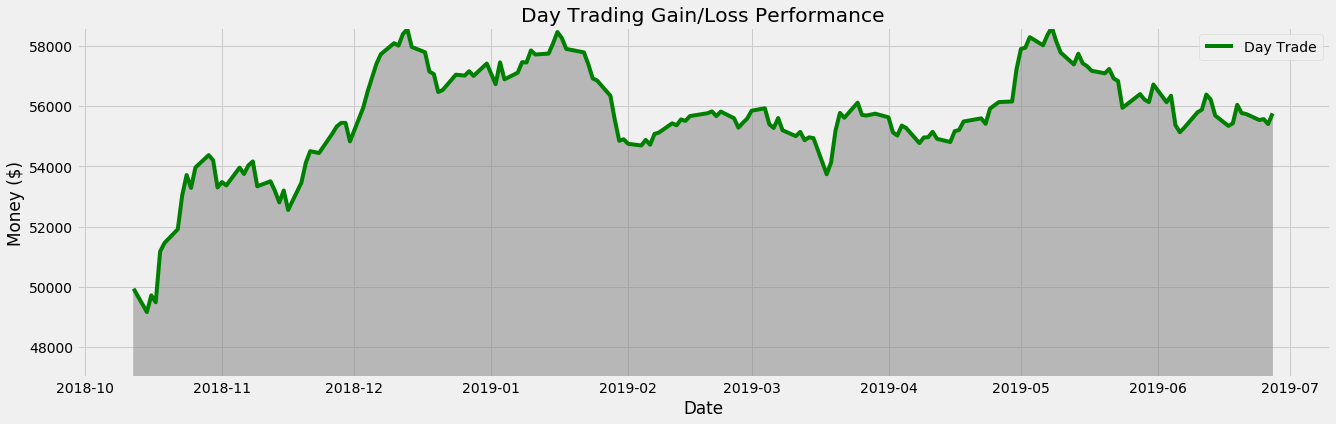

In [1537]:
plt.figure(figsize=(20,6))
plt.title('Long Short Gain/Loss Performance')
plt.xlabel('Date')
plt.ylabel('Money ($)')
plt.plot(df_position.index.values[:177], long_short_fund_remaining[:177], 'green', label = "Long Short Trade")
plt.ylim([47000, df_position['long_short_fund_remaining'].max()+1000])
plt.fill_between(df_position.index.values[:177], long_short_fund_remaining[:177],color='grey',alpha='0.5', interpolate=True)
plt.legend()
plt.show()

plt.figure(figsize=(20,6))
plt.title('Buy Hold Trading Gain/Loss Performance')
plt.xlabel('Date')
plt.ylabel('Money ($)')
plt.plot(df_position.index.values[:177], buy_hold_fund_remaining[:177], 'green', label = "Buy Hold Trade")
plt.ylim([35000,60000])
plt.fill_between(df_position.index.values[:177], buy_hold_fund_remaining[:177],color='grey',alpha='0.5', interpolate=True)
plt.legend()
plt.show()

plt.figure(figsize=(20,6))
plt.title('Day Trading Gain/Loss Performance')
plt.xlabel('Date')
plt.ylabel('Money ($)')
plt.plot(df_position.index.values[:177], day_trade_fund_remaining[:177], 'green', label = "Day Trade")
plt.ylim([47000, df_position['day_trade_fund_remaining'].max()])
plt.fill_between(df_position.index.values[:177], day_trade_fund_remaining[:177],color='grey',alpha='0.5', interpolate=True)
plt.legend()
plt.show()


In [1538]:
Starting_investment = 50000

day_trade_fund = df_position.day_trade_fund_remaining.tolist()[:177]
long_short_fund = df_position.long_short_fund_remaining.tolist()[:177]
buy_hold_fund = df_position.buy_hold_fund_remaining.tolist()[:177]

day_trade_fund.insert(0, Starting_investment)
long_short_fund.insert(0, Starting_investment)
buy_hold_fund.insert(0, Starting_investment)

risk_management_df = pd.DataFrame(index=df_position.index)
risk_management_df['day_trade_fund'] = day_trade_fund
risk_management_df['long_short_fund'] = long_short_fund
risk_management_df['buy_hold_fund'] = buy_hold_fund

risk_management_df['gain_loss_day_trade'] = risk_management_df['day_trade_fund'].diff()
risk_management_df['gain_loss_long_short'] = risk_management_df['long_short_fund'].diff()
risk_management_df['gain_loss_buy_hold'] = risk_management_df['buy_hold_fund'].diff()    


In [1539]:
risk_management_df.tail()

day_trade_fund  long_short_fund  buy_hold_fund  \
Date                                                         
2019-06-24      55739.9910       54564.9955     51440.0005   
2019-06-25      55539.9915       54564.9955     51240.0010   
2019-06-26      55569.9915       54594.9955     51770.0005   
2019-06-27      55404.9915       54594.9955     52180.0005   
2019-06-28      55759.9910       54594.9955     51995.0010   

            gain_loss_day_trade  gain_loss_long_short  gain_loss_buy_hold  
Date                                                                       
2019-06-24             -30.0000                   0.0             80.0000  
2019-06-25            -199.9995                   0.0           -199.9995  
2019-06-26              30.0000                  30.0            529.9995  
2019-06-27            -165.0000                   0.0            410.0000  
2019-06-28             354.9995                   0.0           -184.9995

In [1540]:
profit_days_Day_Trade = sum(n > 0 for n in risk_management_df.gain_loss_day_trade.values.flatten())
profit_days_Long_Short = sum(n > 0 for n in risk_management_df.gain_loss_long_short.values.flatten())
profit_days_Buy_Hold = sum(n > 0 for n in risk_management_df.gain_loss_buy_hold.values.flatten())
loss_days_Day_Trade = sum(n < 0 for n in risk_management_df.gain_loss_day_trade.values.flatten())
loss_days_Long_Short= sum(n < 0 for n in risk_management_df.gain_loss_long_short.values.flatten())
loss_days_Buy_Hold = sum(n < 0 for n in risk_management_df.gain_loss_buy_hold.values.flatten())

In [1541]:
Total_profit = risk_management_df.iloc[:,3:5].where(risk_management_df.iloc[:,3:]>0).sum(axis=0)
Total_loss =  risk_management_df.iloc[:,3:5].where(risk_management_df.iloc[:,3:]<0).sum(axis=0)

Total_profit_days = risk_management_df.iloc[:,3:5].where(risk_management_df.iloc[:,3:]>0).count(axis = 0)
Total_loss_days = risk_management_df.iloc[:,3:5].where(risk_management_df.iloc[:,3:]<0).count(axis = 0)

In [1542]:
Total_profit['gain_loss_buy_hold'] = (risk_management_df['buy_hold_fund'] - 50000)[-1:].values
Total_loss['gain_loss_buy_hold'] = 0
Total_profit_days['gain_loss_buy_hold'] = len(df_position)
Total_loss_days['gain_loss_buy_hold'] = 1

In [1543]:
Total_loss

gain_loss_day_trade    -26640.0010
gain_loss_long_short   -13184.9995
gain_loss_buy_hold          0.0000
dtype: float64

In [1544]:
# return Daily

day_trade_returns = ((risk_management_df['day_trade_fund'] - 50000)/50000) * 100
risk_management_df['day_trade_returns'] = day_trade_returns
long_short_returns = ((risk_management_df['long_short_fund'] - 50000)/50000) * 100
risk_management_df['long_short_returns'] = long_short_returns
buy_hold_returns = ((risk_management_df['buy_hold_fund'] - 50000)/50000) * 100
risk_management_df['buy_hold_returns'] = buy_hold_returns

In [1545]:
risk_management_df

day_trade_fund  long_short_fund  buy_hold_fund  \
Date                                                         
2018-10-12      50000.0000       50000.0000     50000.0000   
2018-10-15      49940.0005       49940.0005     36810.0005   
2018-10-16      49165.0000       49165.0000     50900.0005   
2018-10-17      49720.0005       49165.0000     50460.0000   
2018-10-18      49490.0010       48935.0005     50120.0010   
2018-10-19      51175.0015       50620.0010     48640.0005   
2018-10-22      51460.0025       50905.0020     49325.0010   
2018-10-23      51915.0025       50905.0020     49355.0005   
2018-10-24      53040.0025       52030.0020     48205.0010   
2018-10-25      53715.0025       52705.0020     46445.0005   
2018-10-26      53285.0020       52705.0020     45625.0000   
2018-10-29      53965.0015       53385.0015     45235.0005   
2018-10-30      54375.0025       53795.0025     45410.0010   
2018-10-31      54205.0035       53625.0035     45915.0000   
2018-11-01      53300.0040       53625.0035     46920.0000   
2018-11-02      53480.0040       53625.0035     46925.0005   
2018-11-05      53370.0035       53515.0030     46760.0005   
2018-11-06      53960.0035       53515.0030     47150.0005   
2018-11-07      53750.0035       53305.0030     47730.0005   
2018-11-08      54035.0030       53305.0030     47410.0010   
2018-11-09      54165.0035       53435.0035     47325.0010   
2018-11-12      53340.0040       53435.0035     46325.0010   
2018-11-13      53505.0040       53435.0035     46615.0010   
2018-11-14      53190.0045       53120.0040     47215.0000   
2018-11-15      52805.0040       53120.0040     47555.0005   
2018-11-16      53200.0035       53515.0035     47140.0005   
2018-11-19      52555.0040       53515.0035     46365.0010   
2018-11-20      53460.0035       53515.0035     46415.0000   
2018-11-21      54120.0030       54175.0030     46175.0005   
2018-11-23      54505.0020       54560.0020     46500.0000   
...                    ...              ...            ...   
2019-05-17      57324.9900       55194.9955     50560.0005   
2019-05-20      57174.9900       55194.9955     50150.0005   
2019-05-21      57089.9900       55109.9955     50485.0005   
2019-05-22      57234.9895       55254.9950     50515.0005   
2019-05-23      56919.9900       55254.9950     49990.0010   
2019-05-24      56834.9900       55254.9950     50030.0010   
2019-05-28      55944.9905       54364.9955     51335.0000   
2019-05-29      56399.9905       54364.9955     50855.0005   
2019-05-30      56214.9910       54179.9960     50825.0010   
2019-05-31      56134.9910       54179.9960     50515.0005   
2019-06-03      56719.9910       54764.9960     50600.0005   
2019-06-04      56129.9905       54764.9960     51595.0005   
2019-06-05      56344.9905       54764.9960     51560.0005   
2019-06-06      55369.9910       54764.9960     52720.0005   
2019-06-07      55134.9915       54764.9960     53015.0005   
2019-06-10      55284.9910       54764.9960     53425.0005   
2019-06-11      55794.9910       54764.9960     53015.0005   
2019-06-12      55884.9910       54854.9960     52900.0005   
2019-06-13      56384.9910       55354.9960     52505.0000   
2019-06-14      56214.9910       55184.9960     51990.0010   
2019-06-17      55689.9915       55184.9960     51410.0010   
2019-06-18      55344.9910       54839.9955     52035.0010   
2019-06-19      55429.9910       54839.9955     52060.0005   
2019-06-20      56044.9910       54839.9955     51815.0005   
2019-06-21      55769.9910       54564.9955     51360.0005   
2019-06-24      55739.9910       54564.9955     51440.0005   
2019-06-25      55539.9915       54564.9955     51240.0010   
2019-06-26      55569.9915       54594.9955     51770.0005   
2019-06-27      55404.9915       54594.9955     52180.0005   
2019-06-28      55759.9910       54594.9955     51995.0010   

            gain_loss_day_trade  gain_loss_long_short  gain_loss_buy_hold  \
Date                        

In [1546]:
return_Std = risk_management_df.std(axis = 0, skipna = True)[-3:]

In [1547]:
return_Std

day_trade_returns     3.553529
long_short_returns    2.901793
buy_hold_returns      4.409457
dtype: float64

In [1548]:
risk_management_df.mean(axis = 0, skipna = True)[-3:]

day_trade_returns     11.234430
long_short_returns     9.273087
buy_hold_returns      -2.390168
dtype: float64

In [1549]:
sharpe_Day_Trade = (np.mean(day_trade_returns) - 0.0009)/(np.std(day_trade_returns))
sharpe_Long_Short = (np.mean(long_short_returns) - 0.0009)/(np.std(long_short_returns))
sharpe_Buy_Hold = (np.mean(buy_hold_returns) - 0.0009)/(np.std(buy_hold_returns))

In [1550]:
np.mean(day_trade_returns) 

11.23443040449438

In [1551]:
sharpe_Day_Trade

3.1701498977334226

In [1552]:
sharpe_Long_Short

3.204344213777273

In [1553]:
sharpe_Buy_Hold

-0.5437885995940975

In [1554]:
np.mean(day_trade_returns) -2.0

9.23443040449438

In [1555]:
np.std(day_trade_returns)

3.54353288231767

In [1556]:
##N SHARPE RATIO
## OTHER METHOD
## https://www.suredividend.com/sharpe-ratio-stocks/


In [1557]:
risk_management_df

day_trade_fund  long_short_fund  buy_hold_fund  \
Date                                                         
2018-10-12      50000.0000       50000.0000     50000.0000   
2018-10-15      49940.0005       49940.0005     36810.0005   
2018-10-16      49165.0000       49165.0000     50900.0005   
2018-10-17      49720.0005       49165.0000     50460.0000   
2018-10-18      49490.0010       48935.0005     50120.0010   
2018-10-19      51175.0015       50620.0010     48640.0005   
2018-10-22      51460.0025       50905.0020     49325.0010   
2018-10-23      51915.0025       50905.0020     49355.0005   
2018-10-24      53040.0025       52030.0020     48205.0010   
2018-10-25      53715.0025       52705.0020     46445.0005   
2018-10-26      53285.0020       52705.0020     45625.0000   
2018-10-29      53965.0015       53385.0015     45235.0005   
2018-10-30      54375.0025       53795.0025     45410.0010   
2018-10-31      54205.0035       53625.0035     45915.0000   
2018-11-01      53300.0040       53625.0035     46920.0000   
2018-11-02      53480.0040       53625.0035     46925.0005   
2018-11-05      53370.0035       53515.0030     46760.0005   
2018-11-06      53960.0035       53515.0030     47150.0005   
2018-11-07      53750.0035       53305.0030     47730.0005   
2018-11-08      54035.0030       53305.0030     47410.0010   
2018-11-09      54165.0035       53435.0035     47325.0010   
2018-11-12      53340.0040       53435.0035     46325.0010   
2018-11-13      53505.0040       53435.0035     46615.0010   
2018-11-14      53190.0045       53120.0040     47215.0000   
2018-11-15      52805.0040       53120.0040     47555.0005   
2018-11-16      53200.0035       53515.0035     47140.0005   
2018-11-19      52555.0040       53515.0035     46365.0010   
2018-11-20      53460.0035       53515.0035     46415.0000   
2018-11-21      54120.0030       54175.0030     46175.0005   
2018-11-23      54505.0020       54560.0020     46500.0000   
...                    ...              ...            ...   
2019-05-17      57324.9900       55194.9955     50560.0005   
2019-05-20      57174.9900       55194.9955     50150.0005   
2019-05-21      57089.9900       55109.9955     50485.0005   
2019-05-22      57234.9895       55254.9950     50515.0005   
2019-05-23      56919.9900       55254.9950     49990.0010   
2019-05-24      56834.9900       55254.9950     50030.0010   
2019-05-28      55944.9905       54364.9955     51335.0000   
2019-05-29      56399.9905       54364.9955     50855.0005   
2019-05-30      56214.9910       54179.9960     50825.0010   
2019-05-31      56134.9910       54179.9960     50515.0005   
2019-06-03      56719.9910       54764.9960     50600.0005   
2019-06-04      56129.9905       54764.9960     51595.0005   
2019-06-05      56344.9905       54764.9960     51560.0005   
2019-06-06      55369.9910       54764.9960     52720.0005   
2019-06-07      55134.9915       54764.9960     53015.0005   
2019-06-10      55284.9910       54764.9960     53425.0005   
2019-06-11      55794.9910       54764.9960     53015.0005   
2019-06-12      55884.9910       54854.9960     52900.0005   
2019-06-13      56384.9910       55354.9960     52505.0000   
2019-06-14      56214.9910       55184.9960     51990.0010   
2019-06-17      55689.9915       55184.9960     51410.0010   
2019-06-18      55344.9910       54839.9955     52035.0010   
2019-06-19      55429.9910       54839.9955     52060.0005   
2019-06-20      56044.9910       54839.9955     51815.0005   
2019-06-21      55769.9910       54564.9955     51360.0005   
2019-06-24      55739.9910       54564.9955     51440.0005   
2019-06-25      55539.9915       54564.9955     51240.0010   
2019-06-26      55569.9915       54594.9955     51770.0005   
2019-06-27      55404.9915       54594.9955     52180.0005   
2019-06-28      55759.9910       54594.9955     51995.0010   

            gain_loss_day_trade  gain_loss_long_short  gain_loss_buy_hold  \
Date                        

In [1558]:
df_summary = pd.DataFrame()
df_summary['models'] = ['Day Trade', 'Long Short', 'Buy Hold']
df_summary['Profit'] = [Total_profit['gain_loss_day_trade'],Total_profit['gain_loss_long_short'],Total_profit['gain_loss_buy_hold']]
df_summary['Loss'] = [Total_loss['gain_loss_day_trade'],Total_loss['gain_loss_long_short'],Total_loss['gain_loss_buy_hold']]
df_summary['profit days %'] = [len(risk_management_df[risk_management_df['gain_loss_day_trade'] > 0])/len(risk_management_df) * 100,(len(risk_management_df[risk_management_df['gain_loss_long_short'] > 0])/len(risk_management_df))* 100,(len(risk_management_df[risk_management_df['gain_loss_buy_hold'] > 0])/len(risk_management_df))* 100]
df_summary['loss days %'] = [len(risk_management_df[risk_management_df['gain_loss_day_trade'] < 0])/len(risk_management_df) * 100,(len(risk_management_df[risk_management_df['gain_loss_long_short'] < 0])/len(risk_management_df))* 100,(len(risk_management_df[risk_management_df['gain_loss_buy_hold'] < 0])/len(risk_management_df))* 100]

df_summary['Total Numbers of days'] = [len(risk_management_df),len(risk_management_df),len(risk_management_df)]
df_summary['Total Number of days traded'] = [len(risk_management_df),len(df_position[df_position['position_long_short'] != 0.0]),1]
df_summary['Best Trading day'] = [risk_management_df['gain_loss_day_trade'].idxmax(),risk_management_df['gain_loss_long_short'].idxmax(),risk_management_df['gain_loss_buy_hold'].idxmax()]
df_summary['Worst Trading day'] = [risk_management_df['gain_loss_day_trade'].idxmin(),risk_management_df['gain_loss_long_short'].idxmin(),risk_management_df['gain_loss_buy_hold'].idxmin()]
df_summary['Trading day profit (max)'] = [risk_management_df['gain_loss_day_trade'].max(),risk_management_df['gain_loss_long_short'].max(),risk_management_df['gain_loss_buy_hold'].max()]
df_summary['Trading day loss (max)']= [risk_management_df['gain_loss_day_trade'].min(),risk_management_df['gain_loss_long_short'].min(),risk_management_df['gain_loss_buy_hold'].min()]
df_summary['Sharpe Ratio'] = [sharpe_Day_Trade, sharpe_Long_Short,sharpe_Buy_Hold]
df_summary['standard dev returns'] = [return_Std['day_trade_returns'],return_Std['long_short_returns'],return_Std['buy_hold_returns']]
#df_summary['skweness'] = 
#df_summary['kurtosis'] = 


In [1559]:
df_summary

models                Profit        Loss  profit days %  loss days %  \
0   Day Trade                 32400 -26640.0010      51.685393    47.191011   
1  Long Short                 17780 -13184.9995      26.404494    25.280899   
2    Buy Hold  [1995.0010000000038]      0.0000      50.561798    48.314607   

   Total Numbers of days  Total Number of days traded Best Trading day  \
0                    178                          178       2018-10-19   
1                    178                           93       2018-10-19   
2                    178                            1       2018-10-16   

  Worst Trading day  Trading day profit (max)  Trading day loss (max)  \
0        2019-03-19                 1685.0005              -1200.0000   
1        2019-03-19                 1685.0005              -1200.0000   
2        2018-10-15                14090.0000             -13189.9995   

   Sharpe Ratio  standard dev returns  
0      3.170150              3.553529  
1      3.204344              2.901793  
2     -0.543789              4.409457

In [1561]:
amd.head()

Date  Open  Close  High   Low    Volume  Open_Close  High_Low  \
0 2016-01-04  2.77   2.77  2.82  2.63  32516800        0.00      0.19   
1 2016-01-05  2.77   2.75  2.80  2.64  12972300        0.02      0.16   
2 2016-01-06  2.66   2.51  2.71  2.47  23759400        0.15      0.24   
3 2016-01-07  2.43   2.28  2.48  2.26  22203500        0.15      0.22   
4 2016-01-08  2.36   2.14  2.42  2.10  31822400        0.22      0.32   

   Open_tmr    log_Vol  Close_tmr  
0      2.77  17.297267       2.75  
1      2.66  16.378327       2.51  
2      2.43  16.983489       2.28  
3      2.36  16.915760       2.14  
4      2.16  17.275681       2.34

In [1562]:
amd.Volume.idxmax()

667

## CONCLUSION ==================================================================

#### BUY HOLD

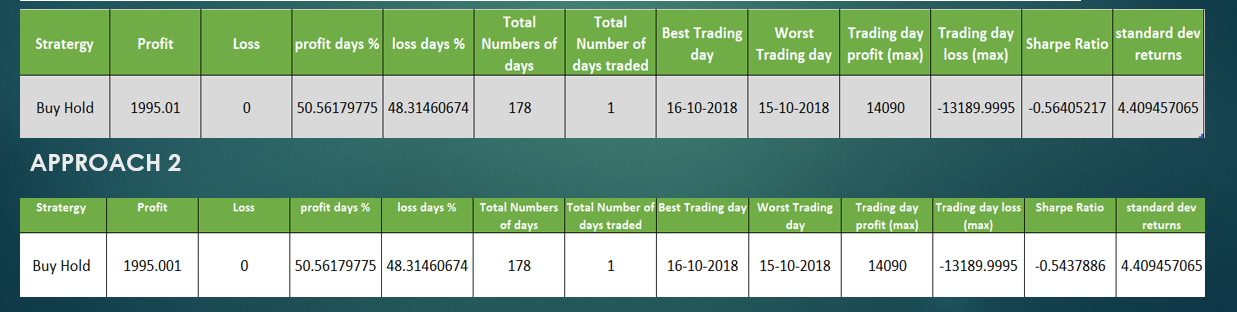

#### LONG SHORT

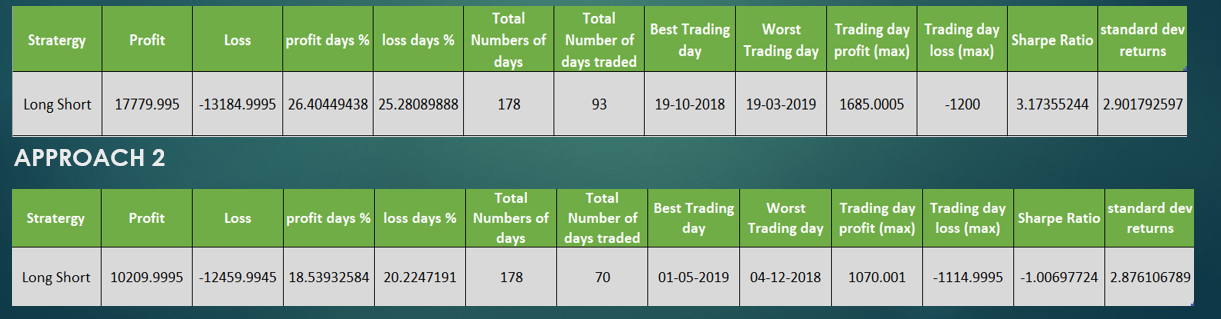


#### DAY TRADE

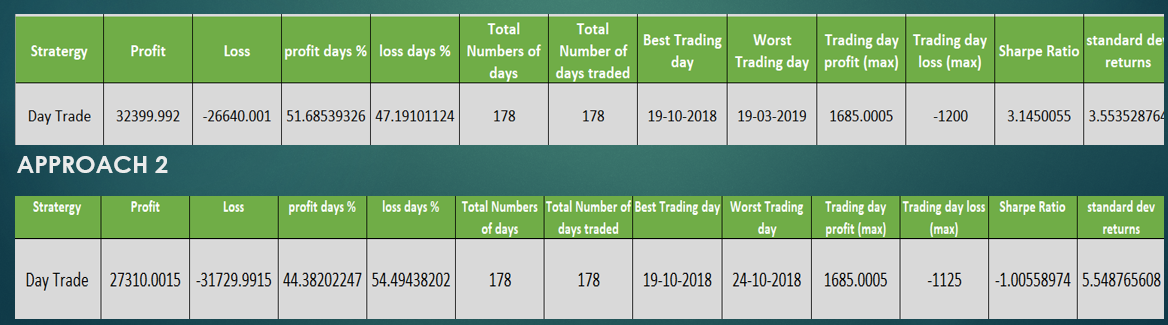

### So, to conclude that we would suggest the 'DAY TRADE' stratergy:
- The model has a good Sharpe Ratio as identified above plus the benefits are more than the 'Long Short' and 'Buy Hold'